### Entegra Report Analysis

In [1]:
# pip install geopy

In [2]:
import unicodedata
import datetime as dt
import os
import sys
import re
import numpy as np
import pandas as pd
from pathlib import Path
import nltk
from nltk import word_tokenize 
import shutil
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import locale
from locale import atof
from geopy.geocoders import Nominatim
from geopy.point import Point
from geopy.exc import GeocoderTimedOut 

##### Functions

In [3]:
# custom character alphabet for word
tr = re.compile(r"[abcçdefgğhıijklmnoöprsştuüvyzqxw]+", re.IGNORECASE|re.UNICODE) # Turkish filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789'
en = re.compile(r"[abcdefghıijklmnopqrstxuvwyz]+", re.IGNORECASE|re.UNICODE) # English
nl = re.compile(r"[abcdefghıijklmnopqrstxuvwyzāăēĕīĭōŏūŭ]+", re.IGNORECASE|re.UNICODE) # Dutch (Flemenk)
fr = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàâæèéêëîïôœùûüÿ]+", re.IGNORECASE|re.UNICODE) # French
de = re.compile(r"[abcdefghıijklmnopqrstxuvwyzäöüß]+", re.IGNORECASE|re.UNICODE) # German
es = re.compile(r"[abcdefghıijklmnopqrstxuvwyzñáéíóú]+", re.IGNORECASE|re.UNICODE) # Spanish (¿¡)
pt = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàáâãéêíóôõú]+", re.IGNORECASE|re.UNICODE) # Portuguese
it = re.compile(r"[abcdefghıijklmnopqrstxuvwyzàéèìòùî]+", re.IGNORECASE|re.UNICODE) # Italian
ar = re.compile(r"[ٿصؼۤڳڲؿڎػڠجڿ٬ٸؽؒؓطۄڀۂؘؔتٚڛےٝڜؖڦ٫ډ۰زۇٖۀ،لۓعٮێڔ۶ؚۧۜڤۏإٞٷؗۖ؈ژۣؕؑٴأۻڸۺگاڴڹۯ؉ْڌ؍ي؟ـٟړۅؐڶُىڽېًۢؠضۚڄٛڏٱۦ٩س٦ڼڂٔۘ٠ښٌٍ۬ٳ۾ٲږذۋٵٜ٘ڞڅںٗهڣۿپڒۥۗڋیؙم؞ثۨٹڵڪظٶۭ١ڭەڨحٕ؎ٺڷٰ۪۫ڻڥۛڑڟټآڡغګ؊ّٯڧڮ؏ۮ؋ؤ٪ؾڗۼق۟دکوِڰڐۃ۽ہفرڇچڝ۴بۈٽڕۡھةٓڃئ؛ڬٙڙڢڱۊَۆۉځ۠ۍۑۙڊنءڈٻشڍ؇۵كخ\ا]+", re.IGNORECASE|re.UNICODE) # Arabic

In [4]:
def convert_one_character_letter(text):
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. \n
    convert_one_character_letter(text): text is any string word or sentence.
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    return new_text

In [5]:
def clean_text(text, custom_alp=tr): # for only string in specific language
    '''This function extract custom_alp character from string \n
    clean_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.
    '''
    # text_clean = re.findall(custom_alp, text)
    text_result_list = []
    text_list = re.findall(r'\S+', text)
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_result = " ".join(text_result_list)
    return text_result

In [6]:
def lower_func(text):
    '''This function convert string character to lowercase. \n
    lower_func(text=str): text is any string word or sentence
    '''
    string_lower = str.lower(text)
    return string_lower

In [7]:
def upper_func(text):
    '''This function convert string character to uppercase. \n
    upper_func(text=str): text is any string word or sentence
    '''
    string_upper = str.upper(text)
    return string_upper

In [8]:
def capitalize_func(text):
    '''This function convert string character to capitalize case. \n
    capitalize_func(text=str): text is any string word or sentence
    '''
    string_capitalize = str.capitalize(text)
    return string_capitalize

In [9]:
def title_func(text):
    '''This function convert string character to title as each word start with capital letter. \n
    title_func(text=str): text is any string word or sentence
    '''
    string_title = str.title(text)
    return string_title

In [10]:
def character_clean_lower_text(text, custom_alp=tr): # for only string in specific language
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. And also extract custom_alp character from string and convert to lowercase. \n
    character_clean_lower_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.  
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    text_result_list = []
    text_list = re.findall(r'\S+', new_text)  # like as word tokenize
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_join = " ".join(text_result_list)
    text_result = str.lower(text_join)
    return text_result

In [11]:
def convert_to_float(value):
    '''This function convert string numeric value to float type. Like as 1.200,15
    convert_to_float(value): value is a string numeric value
    '''
    value = value.replace(".","").replace(",",".")
    return float(value)

In [12]:
def whitespace_del(text):
    '''This function provides removing left right white space.\n
    whitespace_del(text): text is a string value as word or sentence.
    '''
    text_var = str(text)
    text_var = text_var.strip()  # rstrip lstrip
    return text_var

#### Report

In [13]:
input_path = r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Entegra\Sales"
output_path = r"C:\Users\user\Downloads"

data_file = r"Entegra_Sales_List (01.01.2024-11.07.2024)"

In [14]:
# df_entegra = pd.read_excel(fr"{input_path}\{data_file}.xlsx")

# df_entegra.to_csv(fr"{output_path}\{data_file}.csv", encoding='utf8', index=False)

In [15]:
df_entegra = pd.read_csv(fr"{input_path}\{data_file}.csv", low_memory=False)
df_entegra

,id,order_number,platform_reference_no,invoice_number,datetime,date_add,entegration,supplier,status,status_name,...,pov_productCode,payment_type,total_product,PazaryerindenGelenOdemeTutar,total_product_quantity,delivery_method,fatura_tarihi,invoice_url,invoice_type,FaturaTipiAdi
0,178856,2280224850,9352213652,NaN,2024-07-11 16:21:44,2024-07-11 16:23:02,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,NaN,NaN,NaN,0,Seciniz
1,178857,2280223780,9352211863,NaN,2024-07-11 16:20:54,2024-07-11 16:23:17,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,NaN,NaN,0,Seciniz
2,178858,2280223782,9352210132,NaN,2024-07-11 16:20:05,2024-07-11 16:23:19,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,NaN,NaN,0,Seciniz
3,178859,2280222421,9352209819,NaN,2024-07-11 16:19:57,2024-07-11 16:23:22,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,2,Ertesi Gün Kargoda,NaN,NaN,0,Seciniz
4,178860,2280220893,9352209340,NaN,2024-07-11 16:19:42,2024-07-11 16:23:24,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,NaN,NaN,NaN,0,Seciniz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95054,83601,207423367318-1,207423367318,NaN,2024-01-01 00:18:00,2024-01-01 00:24:34,N11,n11,1,Yeni Siparis,...,160620230178,N11,1,0,1,NaN,2024-01-02 10:46:02,NaN,0,Seciniz
95055,83598,1935764998,2424519644,NaN,2024-01-01 00:14:43,2024-01-01 00:18:56,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,3,Ertesi Gün Kargoda,2024-01-02 06:41:47,NaN,0,Seciniz
95056,83596,1935755636,8061482665,NaN,2024-01-01 00:02:03,2024-01-01 00:04:53,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,2024-01-02 08:31:11,NaN,0,Seciniz
95057,83597,201757367316-1,201757367316,NaN,2024-01-01 00:02:00,2024-01-01 00:07:04,N11,n11,1,Yeni Siparis,...,160620230178,N11,1,0,1,NaN,2024-01-02 10:46:02,NaN,0,Seciniz


In [16]:
df_entegra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95059 entries, 0 to 95058
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            95059 non-null  int64  
 1   order_number                  95059 non-null  object 
 2   platform_reference_no         95059 non-null  object 
 3   invoice_number                0 non-null      float64
 4   datetime                      95059 non-null  object 
 5   date_add                      95059 non-null  object 
 6   entegration                   95059 non-null  object 
 7   supplier                      95059 non-null  object 
 8   status                        95059 non-null  int64  
 9   status_name                   95059 non-null  object 
 10  company                       95058 non-null  object 
 11  cargo_code                    92937 non-null  object 
 12  invoice_country               2849 non-null   object 
 13  i

In [17]:
df_entegra.columns = [x.lower() for x in df_entegra.columns]
df_entegra.columns = [x.strip() for x in df_entegra.columns]
df_entegra

,id,order_number,platform_reference_no,invoice_number,datetime,date_add,entegration,supplier,status,status_name,...,pov_productcode,payment_type,total_product,pazaryerindengelenodemetutar,total_product_quantity,delivery_method,fatura_tarihi,invoice_url,invoice_type,faturatipiadi
0,178856,2280224850,9352213652,NaN,2024-07-11 16:21:44,2024-07-11 16:23:02,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,NaN,NaN,NaN,0,Seciniz
1,178857,2280223780,9352211863,NaN,2024-07-11 16:20:54,2024-07-11 16:23:17,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,NaN,NaN,0,Seciniz
2,178858,2280223782,9352210132,NaN,2024-07-11 16:20:05,2024-07-11 16:23:19,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,NaN,NaN,0,Seciniz
3,178859,2280222421,9352209819,NaN,2024-07-11 16:19:57,2024-07-11 16:23:22,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,2,Ertesi Gün Kargoda,NaN,NaN,0,Seciniz
4,178860,2280220893,9352209340,NaN,2024-07-11 16:19:42,2024-07-11 16:23:24,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,NaN,NaN,NaN,0,Seciniz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95054,83601,207423367318-1,207423367318,NaN,2024-01-01 00:18:00,2024-01-01 00:24:34,N11,n11,1,Yeni Siparis,...,160620230178,N11,1,0,1,NaN,2024-01-02 10:46:02,NaN,0,Seciniz
95055,83598,1935764998,2424519644,NaN,2024-01-01 00:14:43,2024-01-01 00:18:56,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,3,Ertesi Gün Kargoda,2024-01-02 06:41:47,NaN,0,Seciniz
95056,83596,1935755636,8061482665,NaN,2024-01-01 00:02:03,2024-01-01 00:04:53,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,2024-01-02 08:31:11,NaN,0,Seciniz
95057,83597,201757367316-1,201757367316,NaN,2024-01-01 00:02:00,2024-01-01 00:07:04,N11,n11,1,Yeni Siparis,...,160620230178,N11,1,0,1,NaN,2024-01-02 10:46:02,NaN,0,Seciniz


In [18]:
df_entegra.columns

Index(['id', 'order_number', 'platform_reference_no', 'invoice_number',
       'datetime', 'date_add', 'entegration', 'supplier', 'status',
       'status_name', 'company', 'cargo_code', 'invoice_country',
       'invoice_city', 'tax_office', 'tax_number', 'tc_id', 'total', 'tax',
       'grand_total', 'sync', 'erp_order_number', 'erp_message',
       'store_order_status', 'store_order_status_name', 'order_process',
       'note', 'supplier1', 'supplier_id', 'cargo_sync', 'cargo_company',
       'cargo_code2', 'cargo_follow_url', 'cargo_finally_statu',
       'cargo_error_message', 'einvoice_error_message', 'invoice_print_name',
       'ship_print_name', 'sevk_tarihi', 'ship_country', 'customer_code',
       'cargo_fee_type_name', 'cargo_packet_type', 'cargo_packet_quantity',
       'grand_total_desi', 'model', 'product_name', 'store_product_name',
       'invoice_name', 'pov_productcode', 'payment_type', 'total_product',
       'pazaryerindengelenodemetutar', 'total_product_quantity',

In [19]:
df_entegra_select_var = df_entegra[["model","product_name","datetime","total_product_quantity","entegration",\
    "invoice_city","invoice_country","total","tax","grand_total","cargo_company","status_name"]]
df_entegra_select_var

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,trendyol,Yalova,NaN,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,trendyol,Bolu,NaN,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,trendyol,Ağrı,NaN,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,trendyol,İstanbul,NaN,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,trendyol,Samsun,NaN,383.33,76.67,460.0,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...
95054,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,1,N11,Kütahya,NaN,153.64,15.36,169.0,mng,Yeni Siparis
95055,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,3,trendyol,Adıyaman,NaN,318.18,31.82,350.0,trendyolekspress,Onaylandı
95056,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,1,trendyol,Aydın,NaN,312.50,62.50,375.0,trendyolekspress,Onaylandı
95057,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,1,N11,Kocaeli,NaN,153.64,15.36,169.0,mng,Yeni Siparis


In [20]:
df_entegra_select_var["invoice_country"].unique()

array([nan, 'Suudi Arabistan', 'Azerbaycan', 'Birleşik Arap Emirlikleri',
       'Türkiye', 'Bahreyn'], dtype=object)

In [21]:
df_entegra_select_var["cargo_company"].unique()

array(['trendyolekspress', 'mng', 'hepsijet', nan, 'eptt', 'yurtici',
       'kolaygelsin', 'surat', 'horoz'], dtype=object)

In [22]:
df_entegra_select_var.loc[:,"invoice_country"] = df_entegra_select_var.loc[:,"invoice_country"].fillna("Türkiye")
df_entegra_select_var

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,trendyol,Yalova,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,trendyol,Bolu,Türkiye,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,trendyol,Ağrı,Türkiye,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,trendyol,İstanbul,Türkiye,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,trendyol,Samsun,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...
95054,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,1,N11,Kütahya,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis
95055,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,3,trendyol,Adıyaman,Türkiye,318.18,31.82,350.0,trendyolekspress,Onaylandı
95056,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,1,trendyol,Aydın,Türkiye,312.50,62.50,375.0,trendyolekspress,Onaylandı
95057,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,1,N11,Kocaeli,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis


<Figure size 1600x900 with 0 Axes>

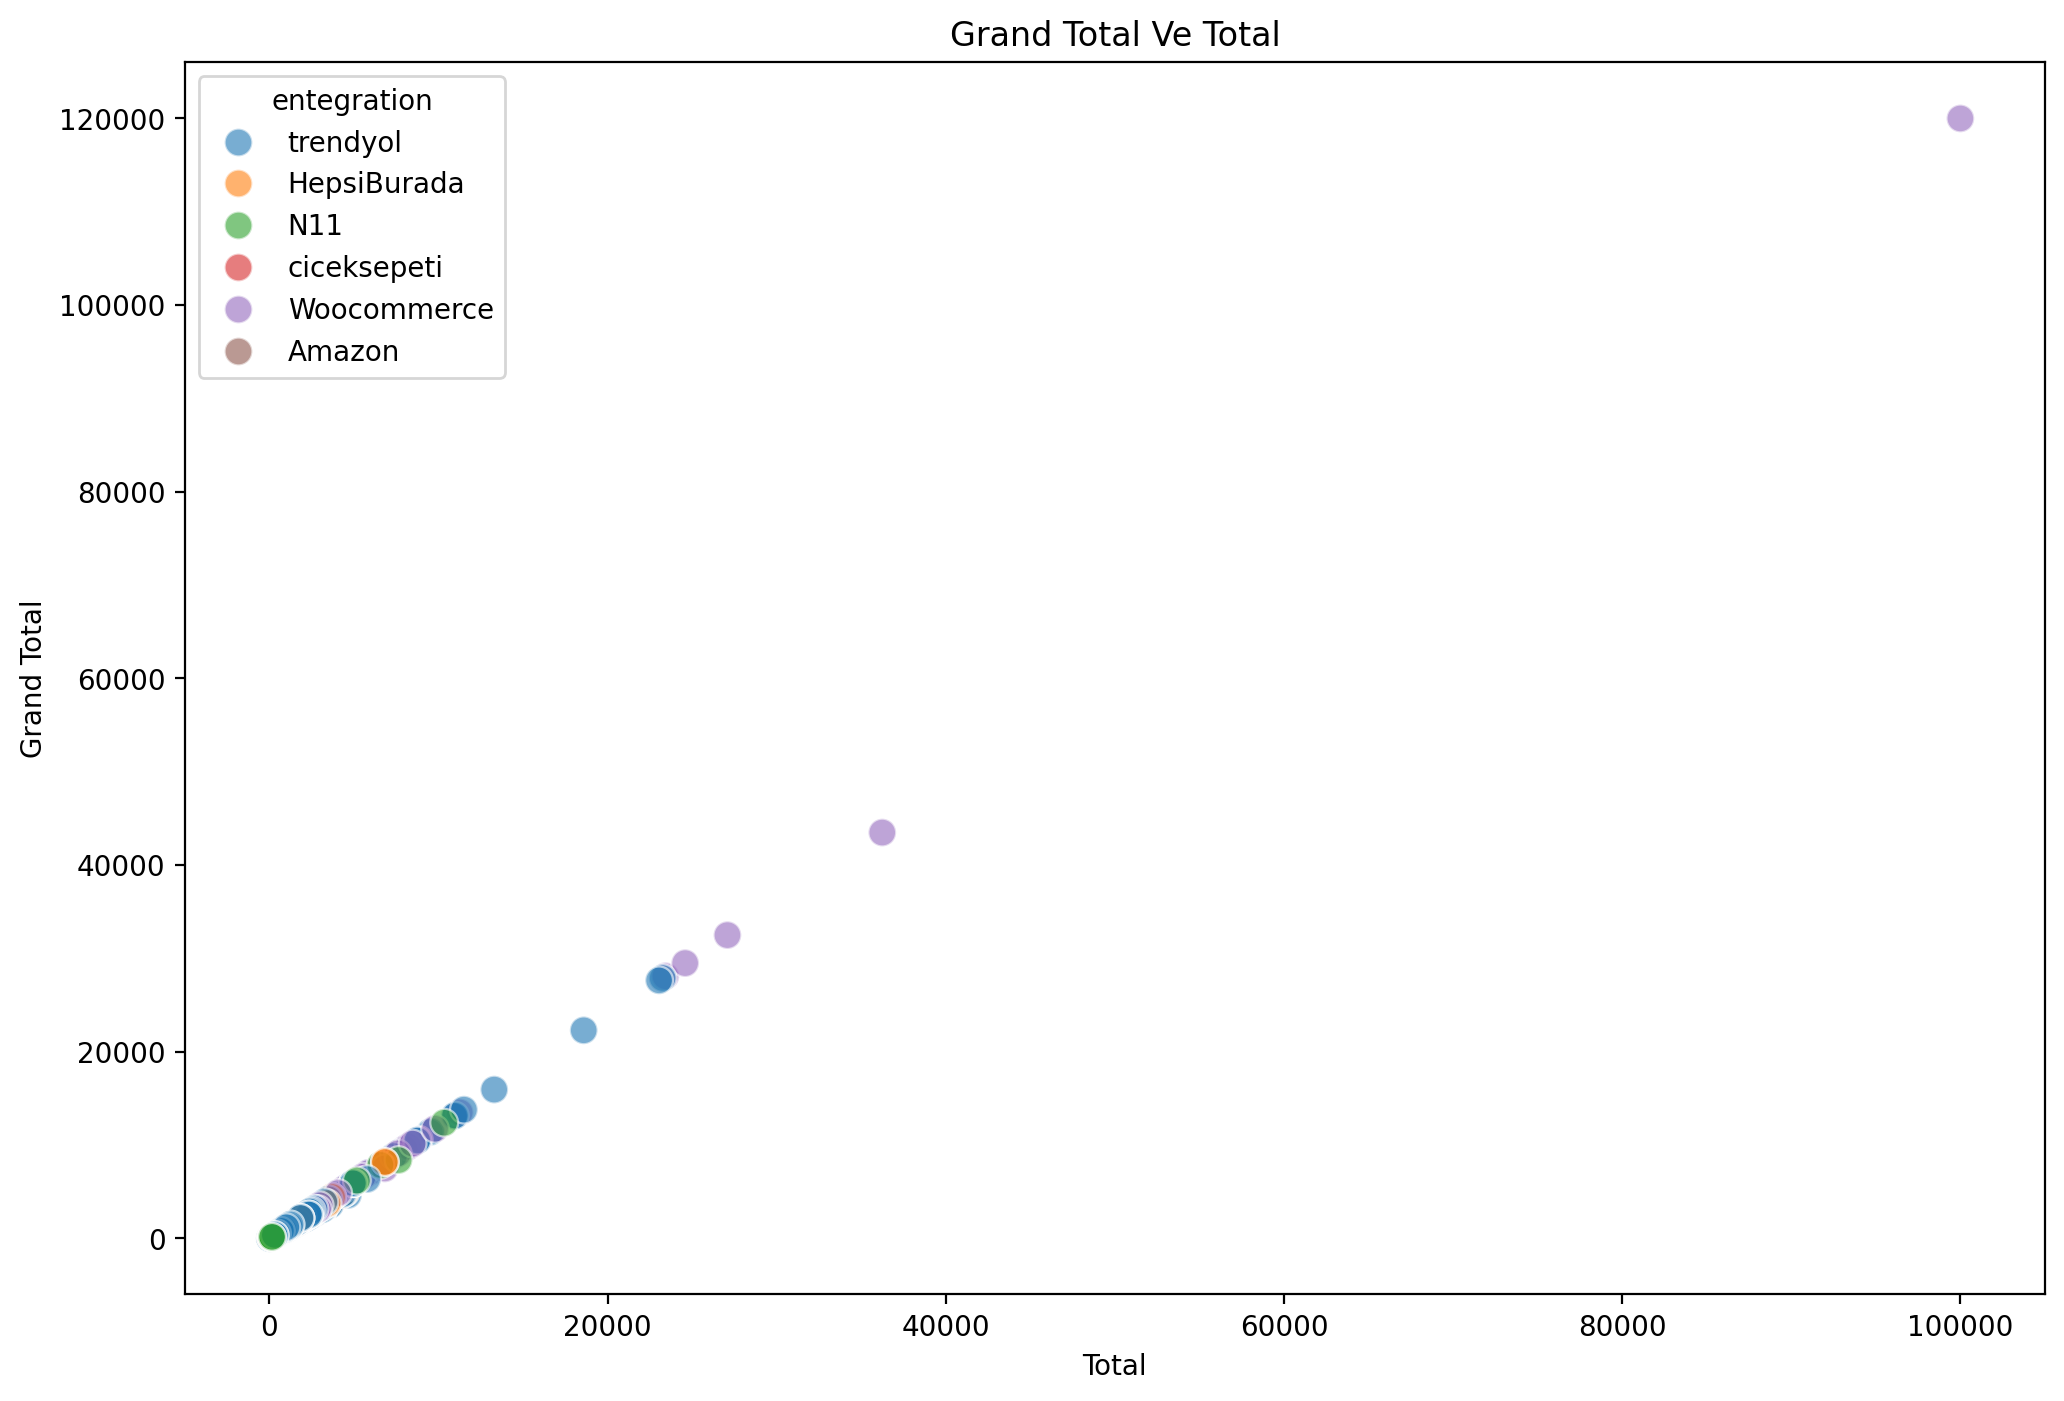

In [23]:
fig = plt.figure(figsize=(16,9), dpi=100)
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="total", y="grand_total", data=df_entegra_select_var,s=100,alpha=0.6, hue="entegration")
plt.xlabel("Total")
plt.ylabel("Grand Total")
plt.title("Grand Total Ve Total");

In [24]:
df_entegra_select_var[df_entegra_select_var["grand_total"] == df_entegra_select_var["grand_total"].max()]

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
21396,004375,AWOX Vıte Pe330 Kıyma Makinesi,2024-06-03 14:38:06,40,Woocommerce,Bilecik,Türkiye,100000.0,20000.0,120000.0,NaN,Yeni Siparis


In [25]:
df_entegra_select_var.loc[:,"cargo_company"] = df_entegra_select_var.loc[:,"cargo_company"].fillna("diger")
df_entegra_select_var

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,trendyol,Yalova,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,trendyol,Bolu,Türkiye,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,trendyol,Ağrı,Türkiye,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,trendyol,İstanbul,Türkiye,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,trendyol,Samsun,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...
95054,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,1,N11,Kütahya,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis
95055,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,3,trendyol,Adıyaman,Türkiye,318.18,31.82,350.0,trendyolekspress,Onaylandı
95056,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,1,trendyol,Aydın,Türkiye,312.50,62.50,375.0,trendyolekspress,Onaylandı
95057,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,1,N11,Kocaeli,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis


In [26]:
df_entegra_select_var[df_entegra_select_var.duplicated(keep=False)].head(5)

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
4005,001603,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",2024-07-03 23:01:51,3,HepsiBurada,İstanbul,Türkiye,316.6583,63.3317,379.99,hepsijet,Onaylandı
4006,001603,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",2024-07-03 23:01:51,3,HepsiBurada,İstanbul,Türkiye,316.6583,63.3317,379.99,hepsijet,Onaylandı
4007,001603,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",2024-07-03 23:01:51,3,HepsiBurada,İstanbul,Türkiye,316.6583,63.3317,379.99,hepsijet,Onaylandı
4048,002263,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",2024-07-03 21:25:21,1,HepsiBurada,Mardin,Türkiye,383.3250,76.6650,459.99,hepsijet,Onaylandı
4049,002263,"İksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",2024-07-03 21:25:21,1,HepsiBurada,Mardin,Türkiye,383.3250,76.6650,459.99,eptt,Onaylandı


In [27]:
# df_entegra_select_var[df_entegra_select_var.duplicated(keep=False)].to_excel(fr"{output_path}\Entegra Aynı Sipariş Tekrarlama.xlsx", index=False)

In [28]:
# pd.to_datetime(df_entegra_select_var['datetime'], format='%Y-%m-%d %H:%M:%S')

In [29]:
df_entegra_select_var = df_entegra_select_var.drop_duplicates()
df_entegra_select_var = df_entegra_select_var.reset_index(drop=True)
df_entegra_select_var

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,trendyol,Yalova,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,trendyol,Bolu,Türkiye,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,trendyol,Ağrı,Türkiye,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,trendyol,İstanbul,Türkiye,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,trendyol,Samsun,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...
94829,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,1,N11,Kütahya,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis
94830,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,3,trendyol,Adıyaman,Türkiye,318.18,31.82,350.0,trendyolekspress,Onaylandı
94831,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,1,trendyol,Aydın,Türkiye,312.50,62.50,375.0,trendyolekspress,Onaylandı
94832,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,1,N11,Kocaeli,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis


In [30]:
df_entegra_select_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94834 entries, 0 to 94833
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   94833 non-null  object 
 1   product_name            94833 non-null  object 
 2   datetime                94834 non-null  object 
 3   total_product_quantity  94834 non-null  int64  
 4   entegration             94834 non-null  object 
 5   invoice_city            94833 non-null  object 
 6   invoice_country         94834 non-null  object 
 7   total                   94834 non-null  float64
 8   tax                     94834 non-null  float64
 9   grand_total             94834 non-null  float64
 10  cargo_company           94834 non-null  object 
 11  status_name             94834 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 8.7+ MB


In [31]:
df_entegra_select_var.loc[:,'datetime'] = pd.to_datetime(df_entegra_select_var.loc[:,'datetime'], format='%Y-%m-%d %H:%M:%S')
df_entegra_select_var.head(5)

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,trendyol,Yalova,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,trendyol,Bolu,Türkiye,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,trendyol,Ağrı,Türkiye,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,trendyol,İstanbul,Türkiye,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,trendyol,Samsun,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı


In [32]:
pd.to_datetime(df_entegra_select_var["datetime"]).dt.date.head(5)

0    2024-07-11
1    2024-07-11
2    2024-07-11
3    2024-07-11
4    2024-07-11
Name: datetime, dtype: object

In [33]:
pd.to_datetime(df_entegra_select_var["datetime"]).dt.time.head(5)

0    16:21:44
1    16:20:54
2    16:20:05
3    16:19:57
4    16:19:42
Name: datetime, dtype: object

In [34]:
df_entegra_select_var.insert(3,"date",pd.to_datetime(df_entegra_select_var["datetime"]).dt.date)
df_entegra_select_var.insert(4,"time",pd.to_datetime(df_entegra_select_var["datetime"]).dt.time)
df_entegra_select_var.head(5)

,model,product_name,datetime,date,time,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,1,trendyol,Yalova,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,1,trendyol,Bolu,Türkiye,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,1,trendyol,Ağrı,Türkiye,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,2,trendyol,İstanbul,Türkiye,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,1,trendyol,Samsun,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı


In [35]:
df_entegra_select_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94834 entries, 0 to 94833
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   94833 non-null  object 
 1   product_name            94833 non-null  object 
 2   datetime                94834 non-null  object 
 3   date                    94834 non-null  object 
 4   time                    94834 non-null  object 
 5   total_product_quantity  94834 non-null  int64  
 6   entegration             94834 non-null  object 
 7   invoice_city            94833 non-null  object 
 8   invoice_country         94834 non-null  object 
 9   total                   94834 non-null  float64
 10  tax                     94834 non-null  float64
 11  grand_total             94834 non-null  float64
 12  cargo_company           94834 non-null  object 
 13  status_name             94834 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

In [36]:
object_columns = df_entegra_select_var.select_dtypes(include='object')
object_columns

,model,product_name,datetime,date,time,entegration,invoice_city,invoice_country,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,trendyol,Yalova,Türkiye,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,trendyol,Bolu,Türkiye,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,trendyol,Ağrı,Türkiye,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,trendyol,İstanbul,Türkiye,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,trendyol,Samsun,Türkiye,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...
94829,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,2024-01-01,00:18:00,N11,Kütahya,Türkiye,mng,Yeni Siparis
94830,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,2024-01-01,00:14:43,trendyol,Adıyaman,Türkiye,trendyolekspress,Onaylandı
94831,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,2024-01-01,00:02:03,trendyol,Aydın,Türkiye,trendyolekspress,Onaylandı
94832,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,2024-01-01,00:02:00,N11,Kocaeli,Türkiye,mng,Yeni Siparis


In [37]:
object_columns.columns

Index(['model', 'product_name', 'datetime', 'date', 'time', 'entegration',
       'invoice_city', 'invoice_country', 'cargo_company', 'status_name'],
      dtype='object')

In [38]:
for column in object_columns.columns:
    df_entegra_select_var.loc[:,f"{column}"] = df_entegra_select_var.loc[:,f"{column}"].apply(lambda x: convert_one_character_letter(x))
    df_entegra_select_var.loc[:,f"{column}"] = df_entegra_select_var.loc[:,f"{column}"].apply(lambda x: whitespace_del(x))
    df_entegra_select_var.loc[:,f"{column}"] = df_entegra_select_var.loc[:,f"{column}"].apply(lambda x: title_func(x))
    
df_entegra_select_var.head(10)

,model,product_name,datetime,date,time,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,1,Trendyol,Yalova,Türkiye,383.33,76.67,460.00,Trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,1,Trendyol,Bolu,Türkiye,154.17,30.83,185.00,Trendyolekspress,Onaylandı
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,1,Trendyol,Ağrı,Türkiye,298.33,59.67,358.00,Trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,2,Trendyol,İstanbul,Türkiye,300.00,60.00,360.00,Trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,1,Trendyol,Samsun,Türkiye,383.33,76.67,460.00,Trendyolekspress,Onaylandı
5,004286,Awox Orbit Gizli Rezistanslı Su Isıtıcı Kettle...,2024-07-11 16:18:35,2024-07-11,16:18:35,1,Trendyol,Ankara,Türkiye,366.67,73.33,440.00,Trendyolekspress,Onaylandı
6,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:17:52,2024-07-11,16:17:52,1,Trendyol,Eskişehir,Türkiye,154.17,30.83,185.00,Trendyolekspress,Onaylandı
7,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:13:44,2024-07-11,16:13:44,1,Trendyol,Buraidah,Suudi Arabistan,460.00,0.00,460.00,Trendyolekspress,Onaylandı
8,002656,Sprey Başlıklı Amber Cam 10 Ml Boş - Yedek Şişe,2024-07-11 16:11:43,2024-07-11,16:11:43,1,Trendyol,Sivas,Türkiye,20.83,4.17,24.99,Mng,Onaylandı
9,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:09:44,2024-07-11,16:09:44,1,Trendyol,İstanbul,Türkiye,383.33,76.67,460.00,Trendyolekspress,Onaylandı


In [39]:
# df_entegra_select_var[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
# df_entegra_select_var

In [40]:
# selected_column = ["product_name","entegration","invoice_city","invoice_country","cargo_company","cargo_company","status_name"] 
# for column in selected_column:
#     df_entegra_select_var[f"{column}"] = df_entegra_select_var[f"{column}"].apply(lambda x: whitespace_del(x))
#     
# df_entegra_select_var.head(10)

In [41]:
# selected_column2 = ["entegration","invoice_city","invoice_country","cargo_company","cargo_company","status_name"] 
# for column in selected_column2:
#     df_entegra_select_var[f"{column}"] = df_entegra_select_var[f"{column}"].apply(lambda x: capitalize_func(x))
# 
# df_entegra_select_var.head(10)

In [42]:
df_entegra_select_product = df_entegra_select_var[["model","product_name"]]
df_entegra_select_product

,model,product_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
2,003954,Awox Barmix Çubuk Blender 1000 W
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
...,...,...
94829,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal..."
94830,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...
94831,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
94832,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal..."


In [43]:
df_entegra_select_product["model"].nunique()

1045

In [44]:
df_entegra_select_product["product_name"].nunique()

1084

In [45]:
df_entegra_select_product = df_entegra_select_product.drop_duplicates()
df_entegra_select_product

,model,product_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
2,003954,Awox Barmix Çubuk Blender 1000 W
5,004286,Awox Orbit Gizli Rezistanslı Su Isıtıcı Kettle...
8,002656,Sprey Başlıklı Amber Cam 10 Ml Boş - Yedek Şişe
...,...,...
94292,002374,Da69 Ahşap Resim Şovalesi 37 Cm
94584,002421,"Çg65 Ahşap Çocuk Makyaj Masası, Pembe Makyaj M..."
94596,002061,Müller Di̇zel Enjektör Temizleyi̇ci̇ (Üstün Al...
94612,002792,21512-21010 Karter Tapasi Kisa Universal


##### Geo Location

In [46]:
def reverse_geocoding(lat, lon):
    '''This function is used for giving city or country name from longitude latitude value \n
    reverse_geocoding(lat, lon): lat is geographical lattitude and lon is geographical longitude \n
    ex. \n
    df['address'] = np.vectorize(reverse_geocoding)(df['Latitude'], df['Longitude'])'''
    try:
        location = geolocator.reverse(Point(lat, lon))
        return location.raw['display_name']
    except:
        return None

In [47]:
def findGeocode(city):
    '''This function is used for giving latitude and longitude values from city or country name \n
    findGeocode(city): city is a city or country \n
    ex. \n
    loc = findGeocode(i) \n 
    lat = loc.latitude \n
    lon = loc.longitude''' 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="tesst") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     

In [48]:
df_entegra_select_var["invoice_city"].nunique()

237

In [49]:
# df_entegra_select_var["invoice_city"].unique()

In [50]:
df_entegra_select_var[df_entegra_select_var["invoice_city"] == "Nan"]

,model,product_name,datetime,date,time,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
20994,Nan,Nan,2024-06-03 22:00:13,2024-06-03,22:00:13,0,Woocommerce,Nan,Türkiye,0.0,0.0,0.0,Diger,Yeni Siparis


In [51]:
df_entegra_city_select = df_entegra_select_var[["invoice_city", "invoice_country"]]
df_entegra_city_select = df_entegra_city_select.drop_duplicates(subset="invoice_city")
df_entegra_city_select = df_entegra_city_select.reset_index(drop=True)
df_entegra_city_select.head(5)

,invoice_city,invoice_country
0,Yalova,Türkiye
1,Bolu,Türkiye
2,Ağrı,Türkiye
3,İstanbul,Türkiye
4,Samsun,Türkiye


In [52]:
# geolocator = Nominatim(user_agent="test")
# 
# # each value from city column 
# # will be fetched and sent to 
# # function find_geocode  
# city = [] 
# latitude = [] 
# longitude = []
# 
# for i in (df_entegra_city_select["invoice_city"]): 
#       
#     if findGeocode(i) != None: 
#            
#         loc = findGeocode(i) 
#           
#         # coordinates returned from  
#         # function is stored into 
#         # two separate list 
#         city.append(i)
#         latitude.append(loc.latitude) 
#         longitude.append(loc.longitude) 
#        
#     # if coordinate for a city not 
#     # found, insert "NaN" indicating  
#     # missing value  
#     else:
#         city.append(np.nan) 
#         latitude.append(np.nan) 
#         longitude.append(np.nan)

In [53]:
# df_entegra_city_select["latitude"] = latitude
# df_entegra_city_select["longitude"] = longitude 
# df_entegra_city_select

In [54]:
# df_entegra_city_select.to_excel(fr"{output_path}\Entegra City Location.xlsx", index=False)

##### Entegra Select And Geo Location

In [55]:
df_city_location = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Geo Location\Entegra City Location.xlsx")
df_city_location.drop("id", axis=1, inplace=True)
df_city_location

,city,invoice_city,country,latitude,longitude
0,Adana,Adana,Türkiye,37.143800,35.498409
1,Adıyaman,Adıyaman,Türkiye,37.763750,38.276348
2,Adıyaman,Adiyaman,Türkiye,37.763750,38.276348
3,Afyonkarahisar,Afyonkarahisar,Türkiye,38.685273,30.642741
4,Afyonkarahisar,Afyon,Türkiye,38.685273,30.642741
...,...,...,...,...,...
262,Yanbu,Yanbu,Suudi Arabistan,24.252616,38.253662
263,Zulfi,Zulfi,Suudi Arabistan,26.312990,44.834462
264,Qairawan,Qairawan,Tunus,35.673549,10.098636
265,Al Khodh,Al Khodh,Umman,23.565997,58.118169


In [56]:
# df_city_location[df_city_location["city"].duplicated(keep=False)]

In [57]:
df_city_location["city"].nunique()

195

In [58]:
df_entegra_select_var

,model,product_name,datetime,date,time,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,1,Trendyol,Yalova,Türkiye,383.33,76.67,460.0,Trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,1,Trendyol,Bolu,Türkiye,154.17,30.83,185.0,Trendyolekspress,Onaylandı
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,1,Trendyol,Ağrı,Türkiye,298.33,59.67,358.0,Trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,2,Trendyol,İstanbul,Türkiye,300.00,60.00,360.0,Trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,1,Trendyol,Samsun,Türkiye,383.33,76.67,460.0,Trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94829,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,2024-01-01,00:18:00,1,N11,Kütahya,Türkiye,153.64,15.36,169.0,Mng,Yeni Siparis
94830,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,2024-01-01,00:14:43,3,Trendyol,Adıyaman,Türkiye,318.18,31.82,350.0,Trendyolekspress,Onaylandı
94831,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,2024-01-01,00:02:03,1,Trendyol,Aydın,Türkiye,312.50,62.50,375.0,Trendyolekspress,Onaylandı
94832,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,2024-01-01,00:02:00,1,N11,Kocaeli,Türkiye,153.64,15.36,169.0,Mng,Yeni Siparis


In [59]:
df_entegra_city_location = pd.merge(df_entegra_select_var, df_city_location, how="left", on="invoice_city")
df_entegra_city_location = df_entegra_city_location.drop_duplicates().reset_index(drop=True)
df_entegra_city_location

,model,product_name,datetime,date,time,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name,city,country,latitude,longitude
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,1,Trendyol,Yalova,Türkiye,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Yalova,Türkiye,40.592898,29.077612
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,1,Trendyol,Bolu,Türkiye,154.17,30.83,185.0,Trendyolekspress,Onaylandı,Bolu,Türkiye,40.621210,31.646026
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,1,Trendyol,Ağrı,Türkiye,298.33,59.67,358.0,Trendyolekspress,Onaylandı,Ağrı,Türkiye,39.777918,43.168437
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,2,Trendyol,İstanbul,Türkiye,300.00,60.00,360.0,Trendyolekspress,Onaylandı,İstanbul,Türkiye,41.006381,28.975872
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,1,Trendyol,Samsun,Türkiye,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Samsun,Türkiye,41.294615,36.332060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94829,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,2024-01-01,00:18:00,1,N11,Kütahya,Türkiye,153.64,15.36,169.0,Mng,Yeni Siparis,Kütahya,Türkiye,39.252251,29.493773
94830,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,2024-01-01,00:14:43,3,Trendyol,Adıyaman,Türkiye,318.18,31.82,350.0,Trendyolekspress,Onaylandı,Adıyaman,Türkiye,37.763750,38.276348
94831,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,2024-01-01,00:02:03,1,Trendyol,Aydın,Türkiye,312.50,62.50,375.0,Trendyolekspress,Onaylandı,Aydın,Türkiye,37.837948,27.845691
94832,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,2024-01-01,00:02:00,1,N11,Kocaeli,Türkiye,153.64,15.36,169.0,Mng,Yeni Siparis,Kocaeli,Türkiye,40.821654,29.950718


In [60]:
df_entegra_select = df_entegra_city_location.drop(["invoice_city","invoice_country"], axis=1)
df_entegra_select

,model,product_name,datetime,date,time,total_product_quantity,entegration,total,tax,grand_total,cargo_company,status_name,city,country,latitude,longitude
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,1,Trendyol,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Yalova,Türkiye,40.592898,29.077612
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,1,Trendyol,154.17,30.83,185.0,Trendyolekspress,Onaylandı,Bolu,Türkiye,40.621210,31.646026
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,1,Trendyol,298.33,59.67,358.0,Trendyolekspress,Onaylandı,Ağrı,Türkiye,39.777918,43.168437
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,2,Trendyol,300.00,60.00,360.0,Trendyolekspress,Onaylandı,İstanbul,Türkiye,41.006381,28.975872
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,1,Trendyol,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Samsun,Türkiye,41.294615,36.332060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94829,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,2024-01-01,00:18:00,1,N11,153.64,15.36,169.0,Mng,Yeni Siparis,Kütahya,Türkiye,39.252251,29.493773
94830,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,2024-01-01,00:14:43,3,Trendyol,318.18,31.82,350.0,Trendyolekspress,Onaylandı,Adıyaman,Türkiye,37.763750,38.276348
94831,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,2024-01-01,00:02:03,1,Trendyol,312.50,62.50,375.0,Trendyolekspress,Onaylandı,Aydın,Türkiye,37.837948,27.845691
94832,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,2024-01-01,00:02:00,1,N11,153.64,15.36,169.0,Mng,Yeni Siparis,Kocaeli,Türkiye,40.821654,29.950718


In [61]:
df_entegra_select["latitude"] = df_entegra_select["latitude"].apply(lambda x: round(x, 6))
df_entegra_select["longitude"] = df_entegra_select["longitude"].apply(lambda x: round(x, 6))
df_entegra_select.head(5)

,model,product_name,datetime,date,time,total_product_quantity,entegration,total,tax,grand_total,cargo_company,status_name,city,country,latitude,longitude
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,1,Trendyol,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Yalova,Türkiye,40.592898,29.077612
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,1,Trendyol,154.17,30.83,185.0,Trendyolekspress,Onaylandı,Bolu,Türkiye,40.621210,31.646026
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,1,Trendyol,298.33,59.67,358.0,Trendyolekspress,Onaylandı,Ağrı,Türkiye,39.777918,43.168437
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,2,Trendyol,300.00,60.00,360.0,Trendyolekspress,Onaylandı,İstanbul,Türkiye,41.006381,28.975872
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,1,Trendyol,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Samsun,Türkiye,41.294615,36.332060


In [62]:
print(df_entegra_select["product_name"].dtype)

object


In [63]:
print(df_entegra_select["latitude"].dtype)

float64


In [64]:
df_entegra_select["city"].nunique()

195

In [65]:
# df_entegra_select.to_excel(fr"{output_path}\Entegra Sales City Location For Tableau.xlsx", index=False)

##### Geo Pandas

In [66]:
# pip install geopandas
# pip install geodatasets
# pip install cartopy
# pip install mplleaflet

In [67]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path
from cartopy import crs as ccrs

<Axes: >

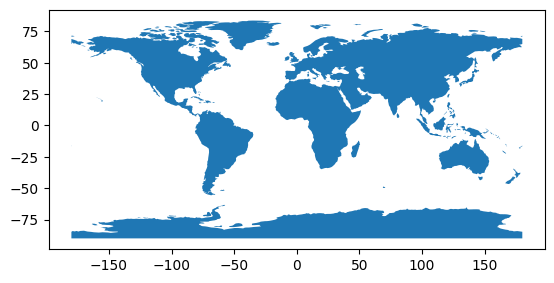

In [68]:
path = get_path("naturalearth.land")  # naturalearth plot 
df = geopandas.read_file(path)

df.plot()

In [69]:
df_geo = df_entegra_select[["country","city","latitude","longitude"]]
df_geo.head(5)

,country,city,latitude,longitude
0,Türkiye,Yalova,40.592898,29.077612
1,Türkiye,Bolu,40.621210,31.646026
2,Türkiye,Ağrı,39.777918,43.168437
3,Türkiye,İstanbul,41.006381,28.975872
4,Türkiye,Samsun,41.294615,36.332060


In [70]:
print(f"{round(df_geo['longitude'].min())}, {round(df_geo['latitude'].min())}, {round(df_geo['longitude'].max())}, {round(df_geo['latitude'].max())}")

10, 17, 58, 42


In [71]:
print(f"{round(df_geo['longitude'].min()-5)}, {round(df_geo['latitude'].min()-5)}, {round(df_geo['longitude'].max()+5)}, {round(df_geo['latitude'].max()+5)}")  # for word.clip([,,,])

5, 12, 63, 47


In [72]:
gdf = geopandas.GeoDataFrame(
    df_geo, geometry=geopandas.points_from_xy(df_geo.longitude, df_geo.latitude), crs="EPSG:4326"
)
gdf.head(5)

,country,city,latitude,longitude,geometry
0,Türkiye,Yalova,40.592898,29.077612,POINT (29.07761 40.5929)
1,Türkiye,Bolu,40.621210,31.646026,POINT (31.64603 40.62121)
2,Türkiye,Ağrı,39.777918,43.168437,POINT (43.16844 39.77792)
3,Türkiye,İstanbul,41.006381,28.975872,POINT (28.97587 41.00638)
4,Türkiye,Samsun,41.294615,36.332060,POINT (36.33206 41.29462)


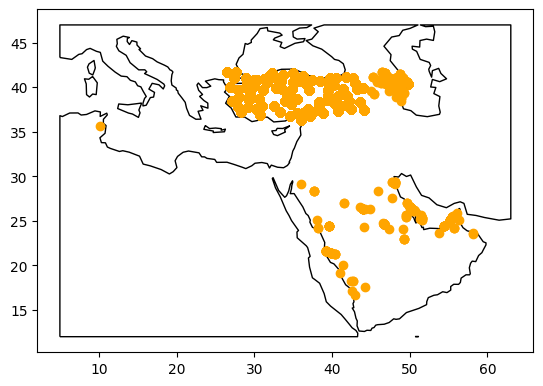

In [73]:
world = geopandas.read_file(get_path("naturalearth.land"))

# We restrict to South America.
# ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

# we resrict to sales area
# ax = world.plot(color="white", edgecolor="black")
ax = world.clip([5, 12, 63, 47]).plot(color="white", edgecolor="black")  # clip = f"{round(df_geo['longitude'].min()-5)}, {round(df_geo['latitude'].min()-5)}, 
                                                                         #            {round(df_geo['longitude'].max()+5)}, {round(df_geo['latitude'].max()+5)}"

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="orange")

plt.show()

##### Sales Order

In [74]:
df_entegra_select["status_name"].unique()

array(['Onaylandı', 'Yeni Siparis', 'İade-İptal'], dtype=object)

In [75]:
entegration_list_all = list(df_entegra_select["entegration"].unique())
entegration_list_all

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Woocommerce', 'Amazon']

In [76]:
df_entegra_select_sales = df_entegra_select[(df_entegra_select["status_name"] == "Onaylandı") | (df_entegra_select["status_name"] == "Yeni Siparis")]
df_entegra_select_sales.reset_index(drop=True, inplace=True)
df_entegra_select_sales

,model,product_name,datetime,date,time,total_product_quantity,entegration,total,tax,grand_total,cargo_company,status_name,city,country,latitude,longitude
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,1,Trendyol,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Yalova,Türkiye,40.592898,29.077612
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,1,Trendyol,154.17,30.83,185.0,Trendyolekspress,Onaylandı,Bolu,Türkiye,40.621210,31.646026
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,1,Trendyol,298.33,59.67,358.0,Trendyolekspress,Onaylandı,Ağrı,Türkiye,39.777918,43.168437
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,2,Trendyol,300.00,60.00,360.0,Trendyolekspress,Onaylandı,İstanbul,Türkiye,41.006381,28.975872
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,1,Trendyol,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Samsun,Türkiye,41.294615,36.332060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92429,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,2024-01-01,00:18:00,1,N11,153.64,15.36,169.0,Mng,Yeni Siparis,Kütahya,Türkiye,39.252251,29.493773
92430,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,2024-01-01,00:14:43,3,Trendyol,318.18,31.82,350.0,Trendyolekspress,Onaylandı,Adıyaman,Türkiye,37.763750,38.276348
92431,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,2024-01-01,00:02:03,1,Trendyol,312.50,62.50,375.0,Trendyolekspress,Onaylandı,Aydın,Türkiye,37.837948,27.845691
92432,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,2024-01-01,00:02:00,1,N11,153.64,15.36,169.0,Mng,Yeni Siparis,Kocaeli,Türkiye,40.821654,29.950718


In [77]:
entegration_list_sales = list(df_entegra_select_sales["entegration"].unique())
entegration_list_sales

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Woocommerce', 'Amazon']

In [78]:
df_sales_quantity_entegration = pd.pivot_table(index="model",columns="entegration", values="total_product_quantity", aggfunc='sum', data=df_entegra_select_sales)
df_sales_quantity_entegration = df_sales_quantity_entegration.fillna(0)
df_sales_quantity_entegration.reset_index(inplace=True)
df_sales_quantity_entegration

entegration,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000028,0.0,0.0,1.0,0.0,0.0,0.0
1,000037,0.0,0.0,2.0,0.0,0.0,0.0
2,000571,0.0,1.0,5.0,0.0,0.0,0.0
3,000580,0.0,0.0,4.0,0.0,0.0,0.0
4,000622,0.0,2.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1031,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0
1032,Nan,0.0,0.0,0.0,0.0,0.0,0.0
1033,Sole,0.0,0.0,0.0,0.0,1.0,0.0
1034,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0


In [79]:
df_sales_quantity_entegration = df_sales_quantity_entegration.rename_axis(None, axis=1)  # del index name (entegration)
df_sales_quantity_entegration

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000028,0.0,0.0,1.0,0.0,0.0,0.0
1,000037,0.0,0.0,2.0,0.0,0.0,0.0
2,000571,0.0,1.0,5.0,0.0,0.0,0.0
3,000580,0.0,0.0,4.0,0.0,0.0,0.0
4,000622,0.0,2.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1031,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0
1032,Nan,0.0,0.0,0.0,0.0,0.0,0.0
1033,Sole,0.0,0.0,0.0,0.0,1.0,0.0
1034,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0


In [80]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_sales:
        df_sales_quantity_entegration[f"{entegration}"] = 0
    else:
        pass
    
df_sales_quantity_entegration

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000028,0.0,0.0,1.0,0.0,0.0,0.0
1,000037,0.0,0.0,2.0,0.0,0.0,0.0
2,000571,0.0,1.0,5.0,0.0,0.0,0.0
3,000580,0.0,0.0,4.0,0.0,0.0,0.0
4,000622,0.0,2.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1031,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0
1032,Nan,0.0,0.0,0.0,0.0,0.0,0.0
1033,Sole,0.0,0.0,0.0,0.0,1.0,0.0
1034,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0


In [81]:
# 1 way
df_sales_quantity_entegration["total_product_sales"] = 0
for entg_column in entegration_list_all:
    df_sales_quantity_entegration["total_product_sales"] += df_sales_quantity_entegration[f"{entg_column}"]
# 2 way
# df_sales_quantity_entegration["total_product_sales"] = df_sales_quantity_entegration[entegration_list_all].sum(axis=1)

# 3 way manuel sum technique
# df_sales_quantity_entegration["total_product_sales"] = df_sales_quantity_entegration["Amazon"] + df_sales_quantity_entegration["Ciceksepeti"] + \
#     df_sales_quantity_entegration["Hepsiburada"] + df_sales_quantity_entegration["N11"] + df_sales_quantity_entegration["Trendyol"] + df_sales_quantity_entegration["Woocommerce"]
# df_sales_quantity_entegration

df_sales_quantity_entegration 

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,000037,0.0,0.0,2.0,0.0,0.0,0.0,2.0
2,000571,0.0,1.0,5.0,0.0,0.0,0.0,6.0
3,000580,0.0,0.0,4.0,0.0,0.0,0.0,4.0
4,000622,0.0,2.0,4.0,1.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...
1031,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1032,Nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1033,Sole,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1034,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0,2724.0


In [82]:
df_sales_name_quantity_entegration  = pd.merge(df_sales_quantity_entegration, df_entegra_select_product, how="left", on="model")
df_sales_name_quantity_entegration.drop_duplicates(inplace=True)
df_sales_name_quantity_entegration

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales,product_name
0,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...
1,000037,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...
2,000571,0.0,1.0,5.0,0.0,0.0,0.0,6.0,"Classone Tl6005 Workout 15,6 Inç Uyumlu Su Geç..."
3,000580,0.0,0.0,4.0,0.0,0.0,0.0,4.0,Classone Pr-R405 Genoa 15.6 Inç Uyumlu Noteboo...
4,000622,0.0,2.0,4.0,1.0,0.0,0.0,7.0,Classone Wg100 Gaming Kablosuz Mouse Siyah
...,...,...,...,...,...,...,...,...,...
1078,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0,2.0,Sarar Sürpriz Ev Tekstil Antrasit Gri Post Pel...
1079,Nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nan
1080,Sole,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Sole 750 W Mini Tost Makinesi
1081,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0,2724.0,Tanımsız


In [83]:
cols = list(df_sales_name_quantity_entegration.columns)
cols = [cols[-1]] + cols[:-1]
df_sales_name_quantity_entegration = df_sales_name_quantity_entegration[cols]
df_sales_name_quantity_entegration

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000037,0.0,0.0,2.0,0.0,0.0,0.0,2.0
2,"Classone Tl6005 Workout 15,6 Inç Uyumlu Su Geç...",000571,0.0,1.0,5.0,0.0,0.0,0.0,6.0
3,Classone Pr-R405 Genoa 15.6 Inç Uyumlu Noteboo...,000580,0.0,0.0,4.0,0.0,0.0,0.0,4.0
4,Classone Wg100 Gaming Kablosuz Mouse Siyah,000622,0.0,2.0,4.0,1.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...
1078,Sarar Sürpriz Ev Tekstil Antrasit Gri Post Pel...,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1079,Nan,Nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1080,Sole 750 W Mini Tost Makinesi,Sole,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1081,Tanımsız,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0,2724.0


In [84]:
df_sales_name_quantity_entegration = df_sales_name_quantity_entegration.sort_values(by="total_product_sales", ascending=False)
df_sales_name_quantity_entegration.reset_index(drop=True, inplace=True)
df_sales_name_quantity_entegration

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0
4,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0
...,...,...,...,...,...,...,...,...,...
1078,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1079,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1080,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1081,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [85]:
df_sales_name_quantity_entegration_drop = df_sales_name_quantity_entegration.drop_duplicates(subset="model")
df_sales_name_quantity_entegration_drop.reset_index(drop=True, inplace=True)
df_sales_name_quantity_entegration_drop

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,606.0,5.0,4336.0,32.0,5195.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,219.0,0.0,4459.0,0.0,4678.0
...,...,...,...,...,...,...,...,...,...
1031,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1032,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1033,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1034,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [86]:
# df_sales_name_quantity_entegration_drop.to_excel(fr"{output_path}\Entegra_Pazaryeri_Satış_Rakamları.xlsx", index=False)

###### Sales Duplicated

In [87]:
df_sales_dublicated_entegration = df_sales_name_quantity_entegration[df_sales_name_quantity_entegration.duplicated(subset="model", keep=False)]
df_sales_dublicated_entegration

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0
4,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0
5,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,606.0,5.0,4336.0,32.0,5195.0
...,...,...,...,...,...,...,...,...,...
658,Pembe Ahşap Oyuncak Buzdolabı Çg126,003817,0.0,0.0,0.0,0.0,7.0,0.0,7.0
748,"Çg113 Sarı Ahşap Çocuk Mutfağı Pembe, Ahşap Mu...",002416,0.0,0.0,3.0,0.0,0.0,1.0,4.0
750,"Çg113 Sarı Ahşap Çocuk Mutfağı Pembe, Ahşap Mu...",002416,0.0,0.0,3.0,0.0,0.0,1.0,4.0
953,"Çg80 Ahşap Çocuk Kelebek Makyaj Masası, Oyun H...",002425,0.0,0.0,0.0,0.0,2.0,0.0,2.0


In [88]:
# df_sales_dublicated_entegration.to_excel(fr"{output_path}\Entegra_Pazaryeri_Satış_Rakamları_Yenile.xlsx", index=False)

##### Sales Visualization

In [89]:
df_sales_visual = df_sales_name_quantity_entegration_drop.head(50)
df_sales_visual

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,606.0,5.0,4336.0,32.0,5195.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,219.0,0.0,4459.0,0.0,4678.0
5,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,0.0,0.0,327.0,116.0,2715.0,319.0,3477.0
6,Kedi Ve Köpek Dekoratif 2'Li Seramik Pleksi Ma...,002708,0.0,0.0,38.0,0.0,2889.0,538.0,3465.0
7,"Yüzük Zikirmatik Karışık Renk, Yeni Nesil Ziki...",003548,0.0,0.0,0.0,65.0,2788.0,333.0,3186.0
8,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,5.0,1006.0,49.0,1812.0,5.0,2877.0
9,Tanımsız,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0,2724.0


In [90]:
select_sales_visual_list = list(df_sales_visual["model"])
# select_sales_visual_list

In [91]:
# df_sales_name_quantity_entegration_drop.drop(columns="model", axis=1)

In [92]:
#dfm = pd.melt(frame=df_sales_name_quantity_entegration_drop, id_vars=["product_name","model"],var_name='cols', value_name='vals')
dfm = df_sales_name_quantity_entegration_drop.melt(id_vars=["product_name","model"],var_name='cols', value_name='vals')
dfm

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,Amazon,0.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Amazon,0.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,Amazon,0.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Amazon,0.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,Amazon,0.0
...,...,...,...,...
7247,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,total_product_sales,1.0
7248,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,total_product_sales,1.0
7249,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,total_product_sales,1.0
7250,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,total_product_sales,1.0


In [93]:
dfm_select = dfm[dfm["model"].isin(select_sales_visual_list)]
dfm_select

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,Amazon,0.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Amazon,0.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,Amazon,0.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Amazon,0.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,Amazon,0.0
...,...,...,...,...
6261,"Awox Sole 750 W Mini Tost Makinesi, Seramik Ka...",003562,total_product_sales,607.0
6262,"Baby Yuvarlak Torbalı Sepet, Çocuk Sepeti Pembe",002901,total_product_sales,589.0
6263,Keçe Kapaklı Kutu Mini Kutu Bej (35X24X24Cm),003078,total_product_sales,527.0
6264,Renkli Desenli Elekli Kedi Tuvalet Önü Paspası...,003280,total_product_sales,514.0


<Figure size 1600x900 with 0 Axes>

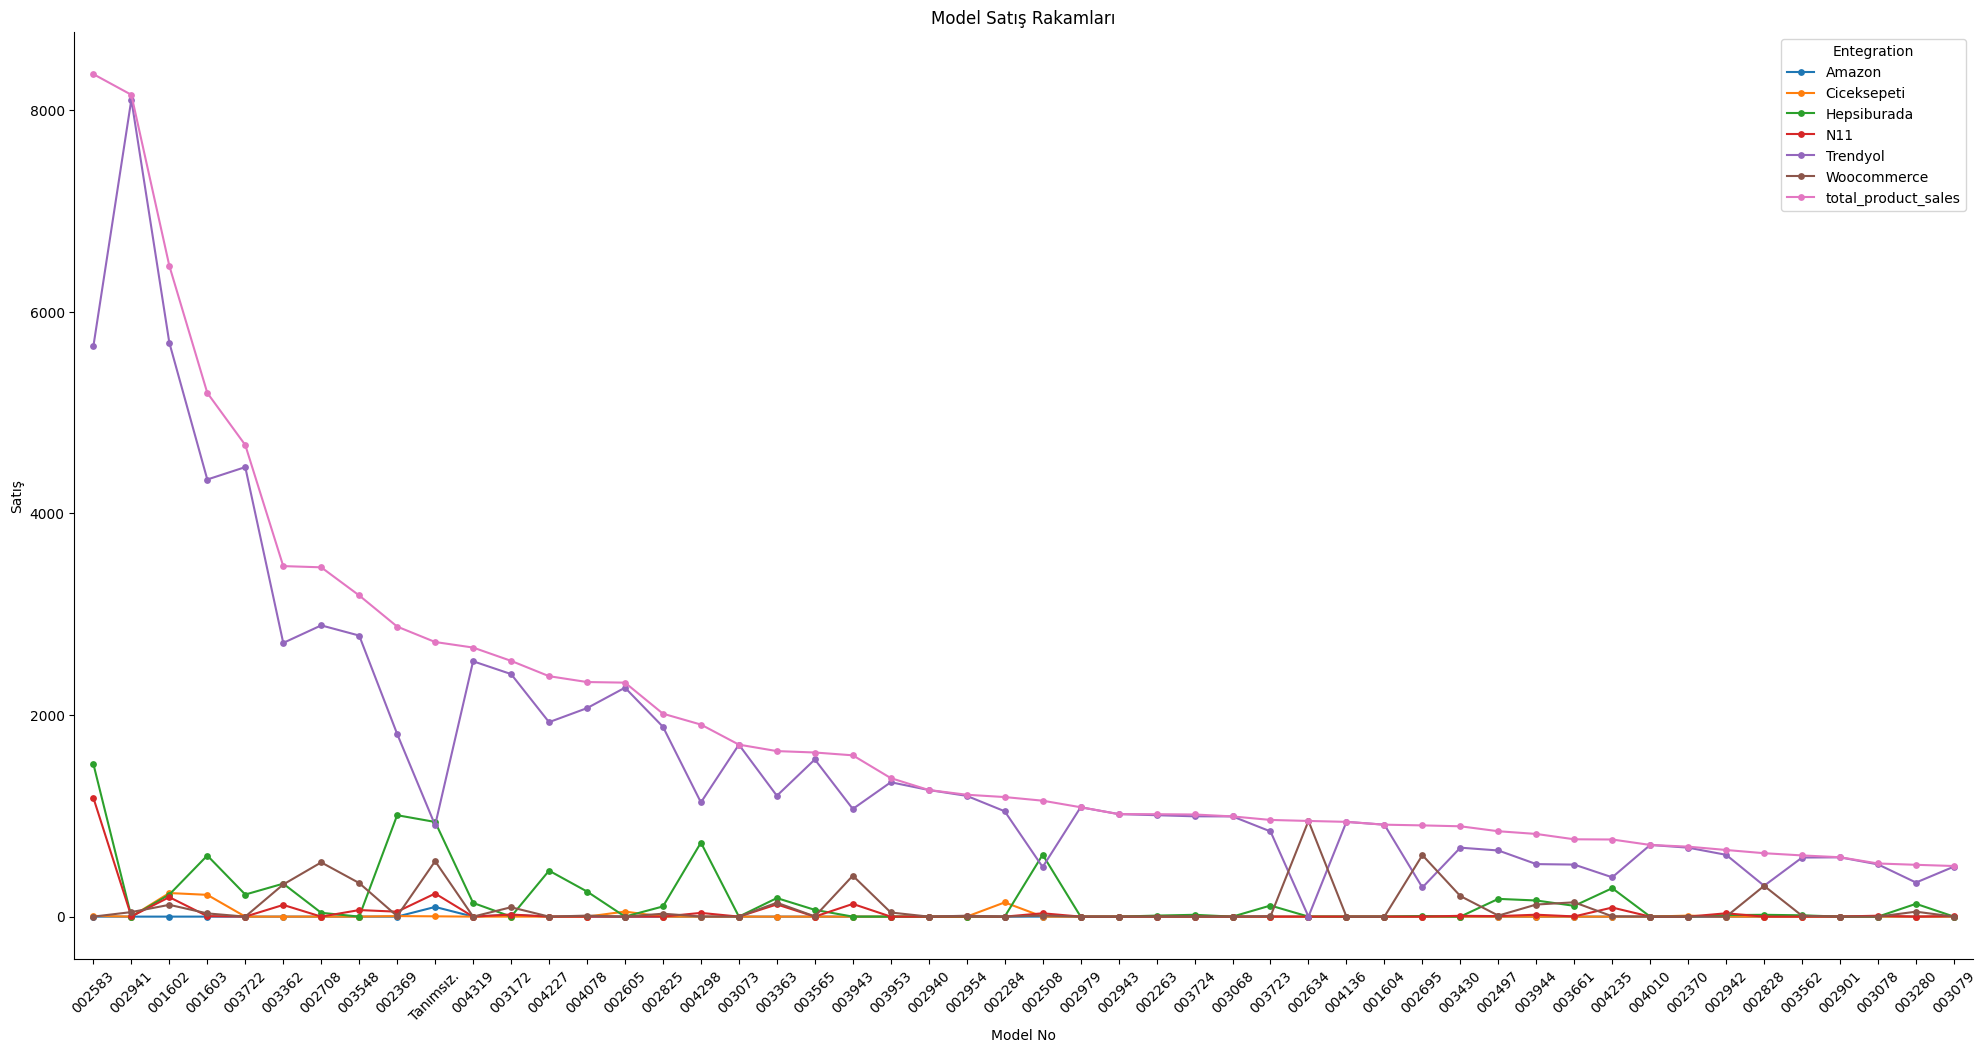

In [94]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.catplot(x="model", y="vals", hue='cols', data=dfm_select, kind='point', legend_out=False, height=10, aspect=2, linewidth=1.5)
# sns.pointplot(x="model", y="vals", hue='cols', data=dfm_select)
plt.xlabel("Model No")
plt.xticks(rotation=45)
plt.ylabel("Satış")
plt.title("Model Satış Rakamları")
plt.legend(title='Entegration', loc='upper right',);

In [95]:
df_sales_select_top = df_sales_name_quantity_entegration_drop.head(20)
df_sales_select_top

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,606.0,5.0,4336.0,32.0,5195.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,219.0,0.0,4459.0,0.0,4678.0
5,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,0.0,0.0,327.0,116.0,2715.0,319.0,3477.0
6,Kedi Ve Köpek Dekoratif 2'Li Seramik Pleksi Ma...,002708,0.0,0.0,38.0,0.0,2889.0,538.0,3465.0
7,"Yüzük Zikirmatik Karışık Renk, Yeni Nesil Ziki...",003548,0.0,0.0,0.0,65.0,2788.0,333.0,3186.0
8,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,5.0,1006.0,49.0,1812.0,5.0,2877.0
9,Tanımsız,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0,2724.0


In [96]:
df_sales_select_top.loc[:,"product_name"] + " | " + df_sales_select_top.loc[:,"model"]

0     Portatif Katlanabilir Masa, Piknik Masası, Bal...
1     Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...
2     Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...
3     Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...
4     Awox Orion 1800 W Tost Makinesi Siyah Awox002 ...
5     6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...
6     Kedi Ve Köpek Dekoratif 2'Li Seramik Pleksi Ma...
7     Yüzük Zikirmatik Karışık Renk, Yeni Nesil Ziki...
8     Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...
9                                  Tanımsız | Tanımsız.
10                  Awox Kafija Kahve Makinesi | 004319
11    4'Lü Çok Amaçlı Dolap Içi Ve Çekmece Içi Düzen...
12    Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmız...
13    Sprey Mop Deterjan Hazneli 3 Adet Moplu Spreyl...
14    Ahşap Özel Isim Baskılı, Kedi Mama Seramik Su ...
15    Çömlek Ayaklı Sırlı Seramik Kedi Mama Kabı | 0...
16    Döküm Limon Sıkacağı - Portakal Limon Narenciy...
17    Çok Amaçlı Düzenleyici Kutu Mini 40X30X26 

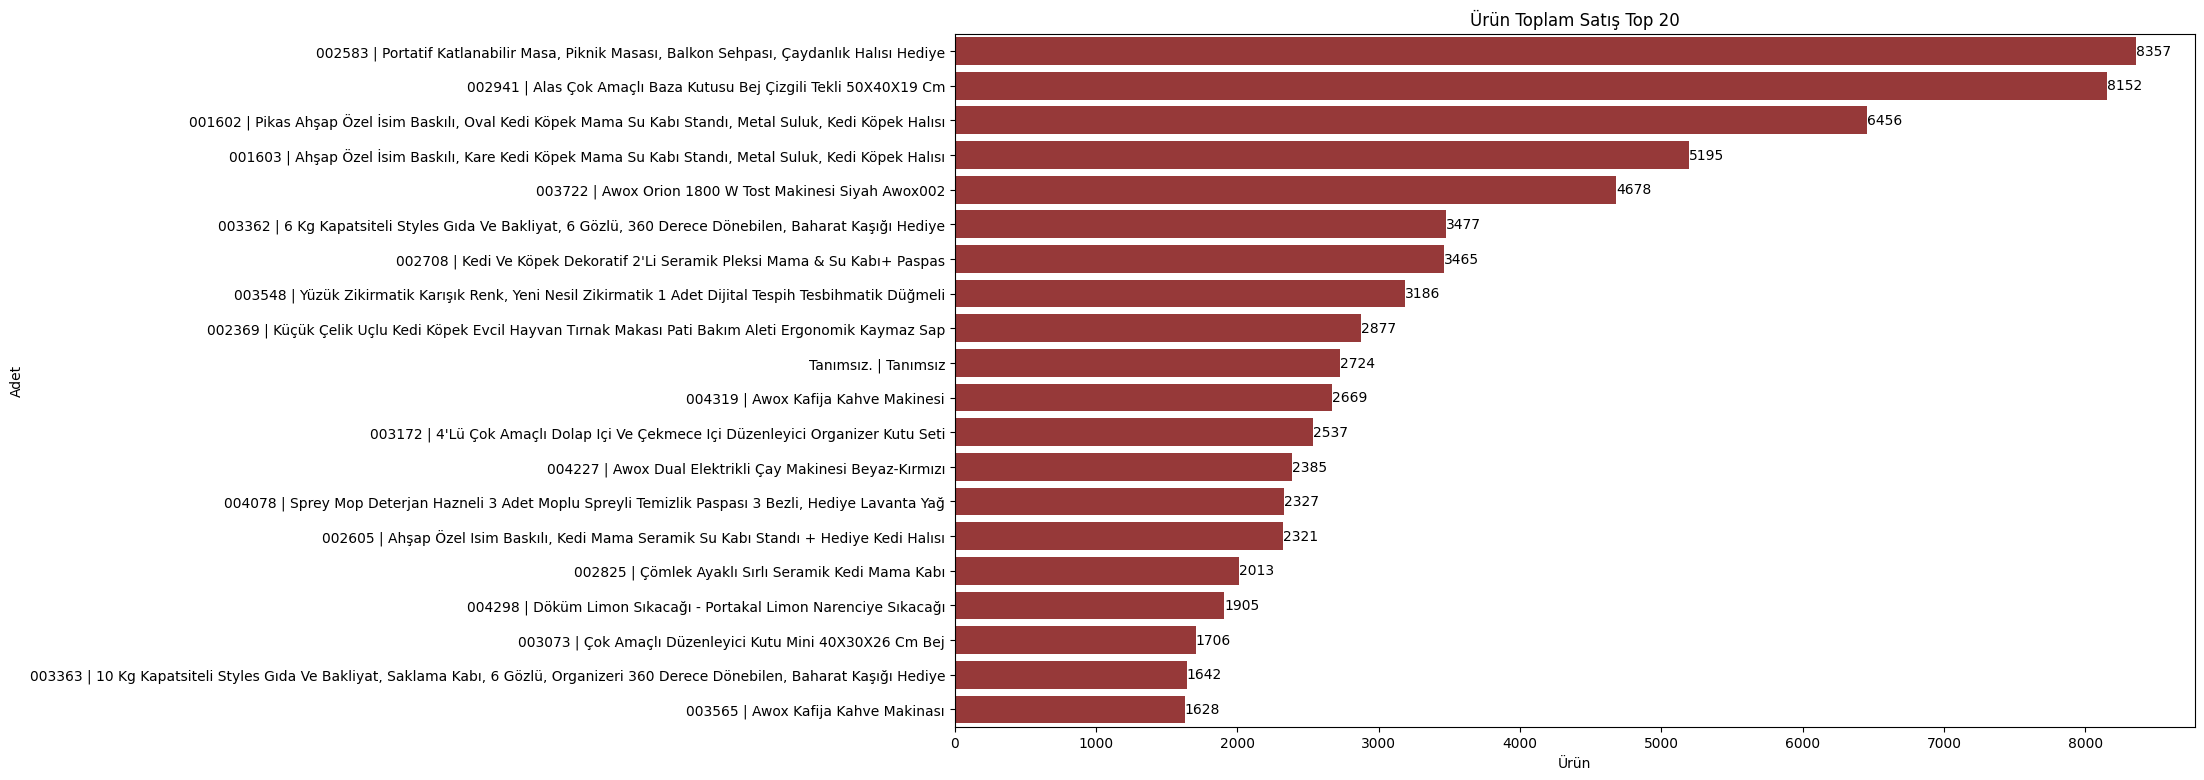

In [97]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_sales_select_top, x="total_product_sales", y="product_name", color="brown")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Ürün")
# plt.xticks(rotation=45)

# ax.set_yticklabels(df_sales_select_top.loc[:,"product_name"] + " " + df_sales_select_top.loc[:,"model"])
ax.set_yticks(range(len(df_sales_select_top)))  # Etiketlerin konumlarını ayarla
ax.set_yticklabels(list(df_sales_select_top.loc[:,"model"] + " | " + df_sales_select_top.loc[:,"product_name"]))

plt.ylabel("Adet")
plt.title("Ürün Toplam Satış Top 20")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

# # for value on graph 2 way
# i=0
# for p in graph.patches:
#     height = p.get_height()
#     graph.text(p.get_x()+p.get_width()/2., height + 0.5,
#         df_seller_evaluation['olumsuz etkiler'].value_counts()[i],ha="center")
#     i += 1;

In [98]:
df_sales_select_last = df_sales_name_quantity_entegration_drop.tail(20)
df_sales_select_last

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
1016,Brillahome Kitchen Desenli Dijital Baskı Yıkan...,002871,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1017,Aytuğ Kadın Modal 5 Çift Özel Kutulu Patik 33246,003916,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1018,Aytuğ Kadın Penye Babet Çorap 5 Çift Özel Kutu...,003919,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1019,Aytuğ Kadın Bambu Patik Çorap 5 Çift Özel Kutu...,003921,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1020,"Baby Puzzle Orman Hayvanlarıi, İlk Puzzle, Beb...",002849,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1021,21512-21010 Karter Tapasi Kisa Universal,002792,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1022,Freeze Dry Elma - Dondurularak Kurutulmuş Elma...,002754,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1023,Katlanabilir Kesme Doğrama Tahtası - Süzgeçli ...,003950,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1024,20 Adet Maskeleme Bandı 19 Mm X 40 Metre Kağıt...,002590,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1025,"Yuvarlak Yılan Zincir Bileklik, Pandora Charm ...",003959,0.0,0.0,0.0,0.0,1.0,0.0,1.0


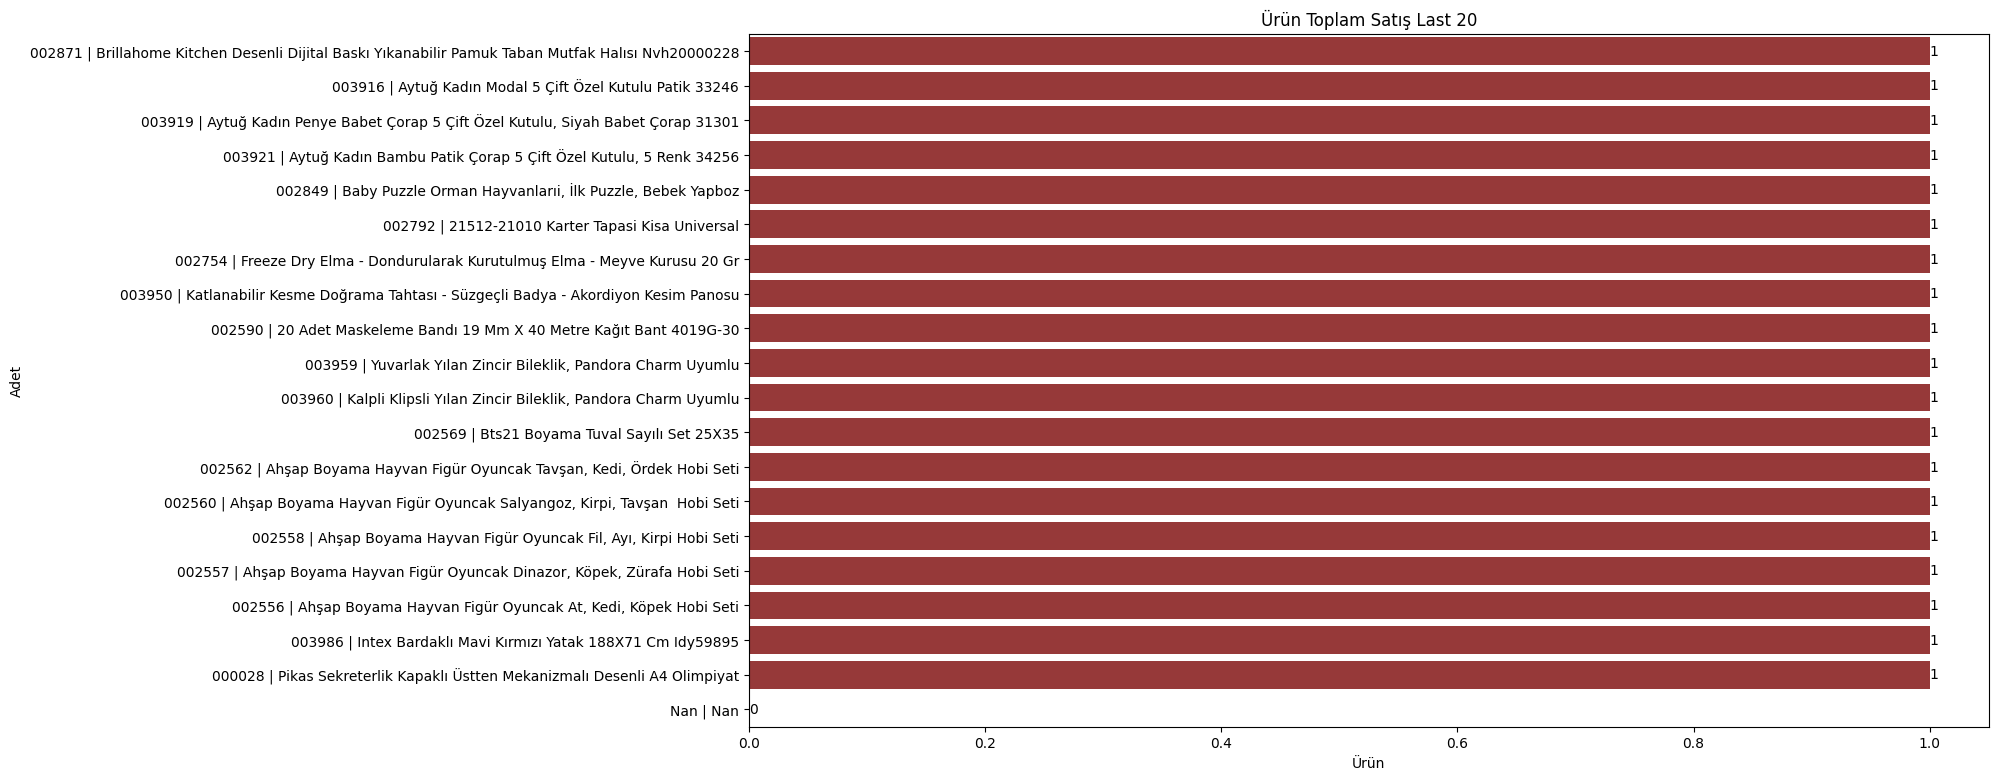

In [99]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_sales_select_last, x="total_product_sales", y="product_name", color="brown")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Ürün")
# plt.xticks(rotation=45)

ax.set_yticks(range(len(df_sales_select_last)))  # Etiketlerin konumlarını ayarla
ax.set_yticklabels(list(df_sales_select_last.loc[:,"model"] + " | " + df_sales_select_last.loc[:,"product_name"]))

plt.ylabel("Adet")
plt.title("Ürün Toplam Satış Last 20")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

##### Entegration Sales Number

In [100]:
dfm

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,Amazon,0.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Amazon,0.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,Amazon,0.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Amazon,0.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,Amazon,0.0
...,...,...,...,...
7247,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,total_product_sales,1.0
7248,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,total_product_sales,1.0
7249,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,total_product_sales,1.0
7250,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,total_product_sales,1.0


In [101]:
dfm2 = dfm[dfm["cols"].isin(entegration_list_all)]
dfm2 = dfm2.dropna()
dfm2 = dfm2[dfm2["vals"] != 0]
dfm2.reset_index(drop=True, inplace=True)
dfm2

,product_name,model,cols,vals
0,Tanımsız,Tanımsız.,Amazon,96.0
1,4'Lü Çok Amaçlı Dolap Içi Ve Çekmece Içi Düzen...,003172,Amazon,17.0
2,Awox Sparkling Kahve Makinesi Krom,003723,Amazon,1.0
3,Furkan Cool Wheels Led Işıklı 3 Tekerlekli Yük...,004137,Amazon,2.0
4,2 Litre Çift Kat Çelik Çay Termosu 1200A (Yeni...,004259,Amazon,7.0
...,...,...,...,...
1907,Orijinal Çelik Zirkon Taşlı Su Yolu Kolye Kara...,003675,Woocommerce,2.0
1908,Kıvrımlı Kedi Tüneli Katlanır Gökkuşağı S Kıvr...,003837,Woocommerce,2.0
1909,Çelik Charm Bileklik Somon,003961,Woocommerce,2.0
1910,Espresso Kahve 250Gr Guatemala Los Suenos,004393,Woocommerce,1.0


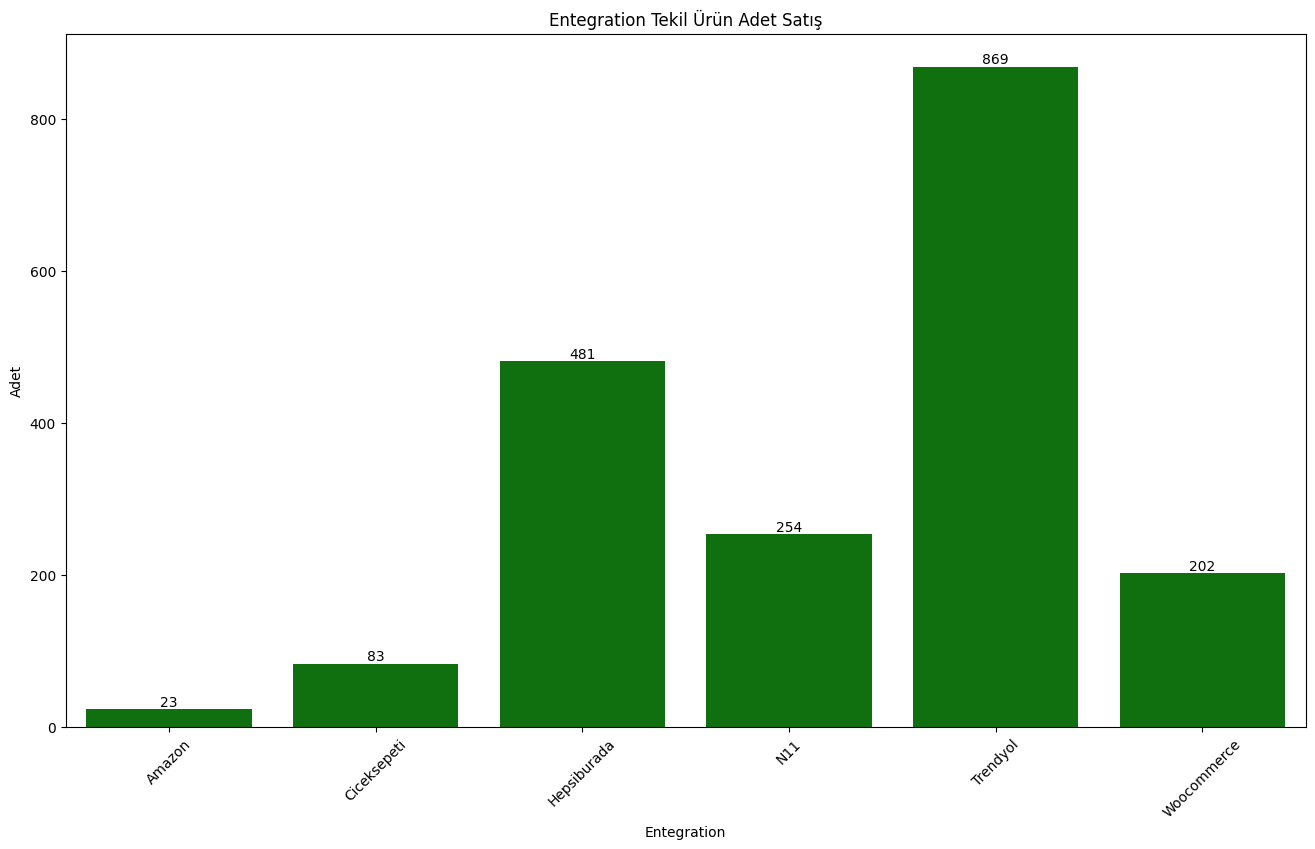

In [102]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.countplot(x="cols", data=dfm2, color="green")
plt.xlabel("Entegration")
plt.xticks(rotation=45)
plt.ylabel("Adet")
plt.title("Entegration Tekil Ürün Adet Satış")
# 1 way
# graph.bar_label(graph.containers[0])
# 2 way
for container in graph.containers:
    graph.bar_label(container)

# Note: Grafik pazaryerlerinde satılan ürün çeşidi sayısını göstermekte.

In [103]:
dfm3 = dfm2.groupby(["cols"])[["vals"]].sum().reset_index()
dfm3

,cols,vals
0,Amazon,209.0
1,Ciceksepeti,1083.0
2,Hepsiburada,14494.0
3,N11,5411.0
4,Trendyol,108630.0
5,Woocommerce,6757.0


In [104]:
dfm3.idxmax()

cols    5
vals    4
dtype: int64

In [105]:
dfm3.index.max()

5

In [106]:
dfm3.loc[dfm3.index.max()+1,:] = {"cols":"Total", "vals":dfm3["vals"].sum()}  # Total sales quantity
dfm3

,cols,vals
0,Amazon,209.0
1,Ciceksepeti,1083.0
2,Hepsiburada,14494.0
3,N11,5411.0
4,Trendyol,108630.0
5,Woocommerce,6757.0
6,Total,136584.0


In [107]:
# i = 0
# for value in values:
#     df.loc[df.index.max()+i,:] = {"cols":"Total", "vals":value}
#     i += 1 

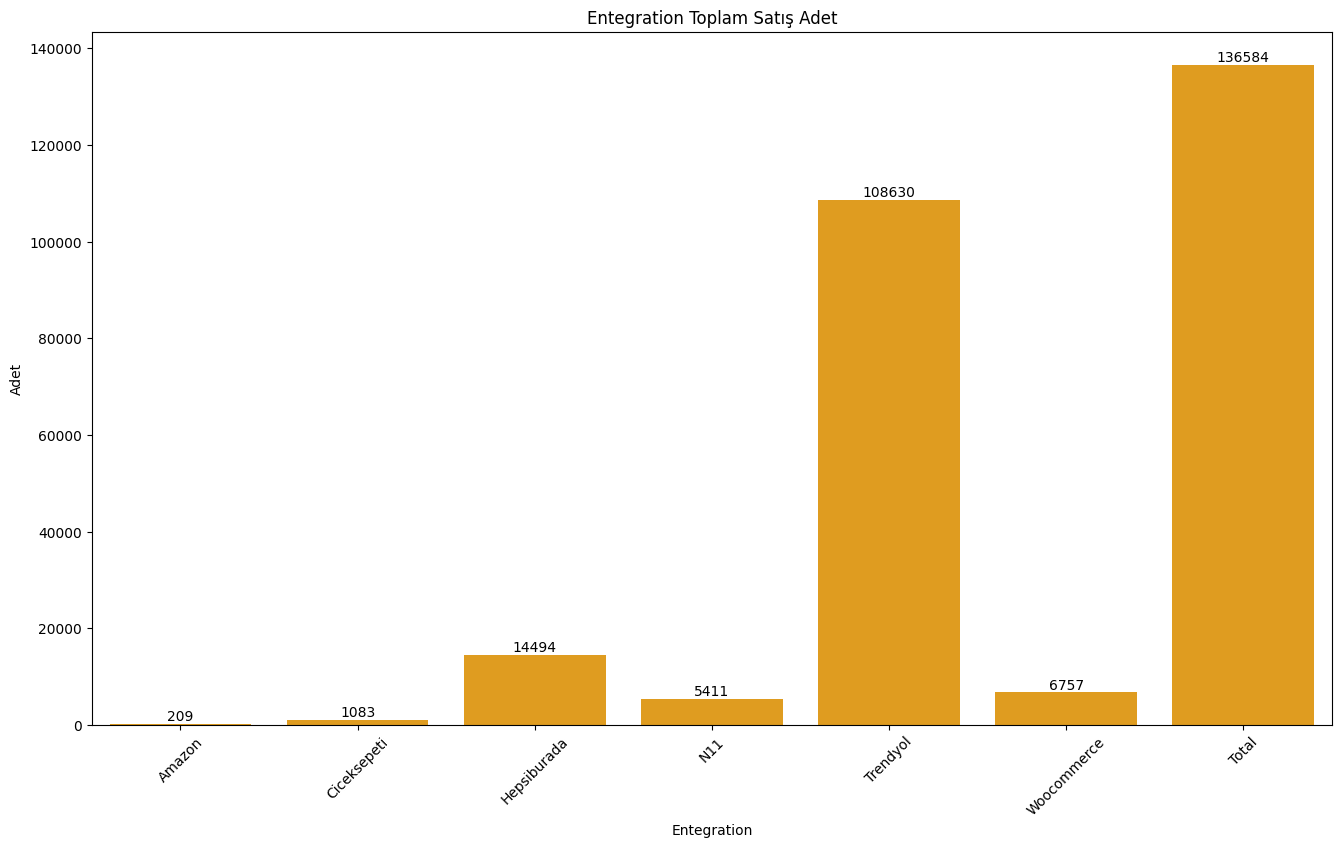

In [108]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.barplot(x="cols", y="vals", data=dfm3, color="orange",)
plt.xlabel("Entegration")
plt.xticks(rotation=45)
plt.ylabel("Adet")
plt.title("Entegration Toplam Satış Adet")
# 1 way
graph.bar_label(graph.containers[0]);

# Note: Grafik pazaryerlerinde ve toplamda satılan toplam ürün sayısını (bir şipariş birden fazla ürün içerebileceğinden ürün sayısı olarak ele alındı) göstermekte.

##### Cancel Order

In [109]:
df_entegra_select["status_name"].unique()

array(['Onaylandı', 'Yeni Siparis', 'İade-İptal'], dtype=object)

In [110]:
df_entegra_select_cancel = df_entegra_select[(df_entegra_select["status_name"] == "İade-İptal")]
df_entegra_select_cancel.reset_index(drop=True, inplace=True)
df_entegra_select_cancel

,model,product_name,datetime,date,time,total_product_quantity,entegration,total,tax,grand_total,cargo_company,status_name,city,country,latitude,longitude
0,003952,"Awox Mercan Kettle Pembe, Mercan Kettle 1,7 Li...",2024-07-11 00:43:35,2024-07-11,00:43:35,1,Trendyol,230.83,46.17,277.00,Trendyolekspress,İade-İptal,Kars,Türkiye,40.455844,42.997953
1,003944,"Katlanabilir Bebek Yıkama Küvet Seti 7 Parça, ...",2024-07-10 18:59:25,2024-07-10,18:59:25,1,Trendyol,658.33,131.67,790.00,Trendyolekspress,İade-İptal,Adana,Türkiye,37.143800,35.498409
2,003661,Kırmızı Kulplu Eğitici Ahşap Montessori Ledli ...,2024-07-10 18:42:29,2024-07-10,18:42:29,1,Trendyol,2041.67,408.33,2450.00,Trendyolekspress,İade-İptal,İzmir,Türkiye,38.423743,27.142802
3,001603,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",2024-07-10 17:27:22,2024-07-10,17:27:22,1,Trendyol,154.17,30.83,185.00,Trendyolekspress,İade-İptal,Bursa,Türkiye,39.989588,28.894467
4,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-10 17:23:27,2024-07-10,17:23:27,1,Trendyol,154.17,30.83,185.00,Trendyolekspress,İade-İptal,İzmir,Türkiye,38.423743,27.142802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,003661,Kırmızı Kulplu Eğitici Ahşap Montessori Mutfak...,2024-01-01 19:27:16,2024-01-01,19:27:16,1,Trendyol,1250.00,250.00,1500.00,Trendyolekspress,İade-İptal,Bursa,Türkiye,39.989588,28.894467
2396,002413,"Çg108 Siyah Ahşap Ledli Çocuk Mutfağı Siyah, A...",2024-01-01 17:05:12,2024-01-01,17:05:12,1,Trendyol,1833.33,366.67,2200.00,Trendyolekspress,İade-İptal,Bursa,Türkiye,39.989588,28.894467
2397,001602,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",2024-01-01 15:59:00,2024-01-01,15:59:00,3,Trendyol,237.53,40.09,277.62,Trendyolekspress,İade-İptal,Balıkesir,Türkiye,39.653182,27.889650
2398,002857,Brillahome Petek Desenli Dijital Baskı Pamuk T...,2024-01-01 14:48:15,2024-01-01,14:48:15,1,Trendyol,150.00,15.00,165.00,Trendyolekspress,İade-İptal,Ankara,Türkiye,39.920776,32.854050


In [111]:
entegration_list_all = list(df_entegra_select["entegration"].unique())
entegration_list_all

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Woocommerce', 'Amazon']

In [112]:
entegration_list_cancel = list(df_entegra_select_cancel["entegration"].unique())
entegration_list_cancel

['Trendyol']

In [113]:
df_cancel_quantity_entegration = pd.pivot_table(index="model",columns="entegration", values="total_product_quantity", aggfunc='sum', data=df_entegra_select_cancel)
df_cancel_quantity_entegration = df_cancel_quantity_entegration.fillna(0)
df_cancel_quantity_entegration.reset_index(inplace=True)
df_cancel_quantity_entegration

entegration,model,Trendyol
0,000622,1
1,000688,4
2,000697,2
3,000699,2
4,000801,2
...,...,...
330,004374,6
331,004375,4
332,004388,2
333,004442,1


In [114]:
df_cancel_quantity_entegration = df_cancel_quantity_entegration.rename_axis(None, axis=1)  # del index name
df_cancel_quantity_entegration

,model,Trendyol
0,000622,1
1,000688,4
2,000697,2
3,000699,2
4,000801,2
...,...,...
330,004374,6
331,004375,4
332,004388,2
333,004442,1


In [115]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_cancel:
        df_cancel_quantity_entegration[f"{entegration}"] = 0
    else:
        pass
    
df_cancel_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon
0,000622,1,0,0,0,0,0
1,000688,4,0,0,0,0,0
2,000697,2,0,0,0,0,0
3,000699,2,0,0,0,0,0
4,000801,2,0,0,0,0,0
...,...,...,...,...,...,...,...
330,004374,6,0,0,0,0,0
331,004375,4,0,0,0,0,0
332,004388,2,0,0,0,0,0
333,004442,1,0,0,0,0,0


In [116]:
# 1 way
# df_cancel_quantity_entegration["total_product_cancel"] = 0
# for entg_column in entegration_list_all:
#     df_cancel_quantity_entegration["total_product_cancel"] += df_cancel_quantity_entegration[f"{entg_column}"]

# 2 way
df_cancel_quantity_entegration["total_product_cancel"] = df_cancel_quantity_entegration[entegration_list_all].sum(axis=1)

df_cancel_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,000622,1,0,0,0,0,0,1
1,000688,4,0,0,0,0,0,4
2,000697,2,0,0,0,0,0,2
3,000699,2,0,0,0,0,0,2
4,000801,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...
330,004374,6,0,0,0,0,0,6
331,004375,4,0,0,0,0,0,4
332,004388,2,0,0,0,0,0,2
333,004442,1,0,0,0,0,0,1


In [117]:
# df_cancel_quantity_entegration["total_product_cancel"] = df_cancel_quantity_entegration["Amazon"] + df_cancel_quantity_entegration["Ciceksepeti"] + \
#     df_cancel_quantity_entegration["Hepsiburada"] + df_cancel_quantity_entegration["N11"] + df_cancel_quantity_entegration["Trendyol"] + df_cancel_quantity_entegration["Woocommerce"]
# df_cancel_quantity_entegration

In [118]:
df_cancel_name_quantity_entegration  = pd.merge(df_cancel_quantity_entegration, df_entegra_select_product, how="left", on="model")
df_cancel_name_quantity_entegration.drop_duplicates(inplace=True)
df_cancel_name_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel,product_name
0,000622,1,0,0,0,0,0,1,Classone Wg100 Gaming Kablosuz Mouse Siyah
1,000688,4,0,0,0,0,0,4,"Hobby Life Alaska Nofrost Saklama Kabı 0,65 Li..."
2,000697,2,0,0,0,0,0,2,"Hobby Life Alaska Nofrost Saklama Kabı 1,85 Li..."
3,000699,2,0,0,0,0,0,2,"Hobby Life Alaska Nofrost Saklama Kabı 1,85 Li..."
4,000801,2,0,0,0,0,0,2,Natureva Çörekotu Yağı 10 Ml
...,...,...,...,...,...,...,...,...,...
358,004374,6,0,0,0,0,0,6,Awox Kıyma Makinası Et Çekme Makinası Sucuk So...
359,004375,4,0,0,0,0,0,4,Awox Vıte Pe330 Kıyma Makinesi
360,004388,2,0,0,0,0,0,2,100 Adet Pratik Tazeliği Koruyan Tencere Ve Ta...
361,004442,1,0,0,0,0,0,1,Bakır Görünümlü Çelik Sahan Seti Omlet Yumurta...


In [119]:
# df_cancel_name_quantity_entegration[[df_cancel_name_quantity_entegration.columns[-1]]]

In [120]:
cols = list(df_cancel_name_quantity_entegration.columns)
cols = [cols[-1]] + cols[:-1]
df_cancel_name_quantity_entegration = df_cancel_name_quantity_entegration[cols]
df_cancel_name_quantity_entegration

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,Classone Wg100 Gaming Kablosuz Mouse Siyah,000622,1,0,0,0,0,0,1
1,"Hobby Life Alaska Nofrost Saklama Kabı 0,65 Li...",000688,4,0,0,0,0,0,4
2,"Hobby Life Alaska Nofrost Saklama Kabı 1,85 Li...",000697,2,0,0,0,0,0,2
3,"Hobby Life Alaska Nofrost Saklama Kabı 1,85 Li...",000699,2,0,0,0,0,0,2
4,Natureva Çörekotu Yağı 10 Ml,000801,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
358,Awox Kıyma Makinası Et Çekme Makinası Sucuk So...,004374,6,0,0,0,0,0,6
359,Awox Vıte Pe330 Kıyma Makinesi,004375,4,0,0,0,0,0,4
360,100 Adet Pratik Tazeliği Koruyan Tencere Ve Ta...,004388,2,0,0,0,0,0,2
361,Bakır Görünümlü Çelik Sahan Seti Omlet Yumurta...,004442,1,0,0,0,0,0,1


In [121]:
df_cancel_name_quantity_entegration = df_cancel_name_quantity_entegration.sort_values(by="total_product_cancel", ascending=False)
df_cancel_name_quantity_entegration.reset_index(drop=True, inplace=True)
df_cancel_name_quantity_entegration

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,267,0,0,0,0,0,267
2,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,267,0,0,0,0,0,267
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,239,0,0,0,0,0,239
4,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,198,0,0,0,0,0,198
...,...,...,...,...,...,...,...,...,...
358,"1300 Derece Profesyonel Pürmüz Kafa, Pürmüz Ba...",0034301,1,0,0,0,0,0,1
359,Çocuk Oyun Etkinlik Çalışma Masası Aktivite Ma...,003431,1,0,0,0,0,0,1
360,Eternity Fitilli Peluş Tek Kişilik Nevresim Ta...,003485,1,0,0,0,0,0,1
361,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,1,0,0,0,0,0,1


In [122]:
df_cancel_name_quantity_entegration_drop = df_cancel_name_quantity_entegration.drop_duplicates(subset="model")
df_cancel_name_quantity_entegration_drop.reset_index(drop=True, inplace=True)
df_cancel_name_quantity_entegration_drop

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,267,0,0,0,0,0,267
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,239,0,0,0,0,0,239
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,198,0,0,0,0,0,198
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,155,0,0,0,0,0,155
...,...,...,...,...,...,...,...,...,...
330,"1300 Derece Profesyonel Pürmüz Kafa, Pürmüz Ba...",0034301,1,0,0,0,0,0,1
331,Çocuk Oyun Etkinlik Çalışma Masası Aktivite Ma...,003431,1,0,0,0,0,0,1
332,Eternity Fitilli Peluş Tek Kişilik Nevresim Ta...,003485,1,0,0,0,0,0,1
333,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,1,0,0,0,0,0,1


In [123]:
# df_cancel_name_quantity_entegration_drop.to_excel(fr"{output_path}\Entegra_Pazaryeri_İptal_Rakamları.xlsx", index=False)

###### Cancel Duplicated

In [124]:
df_cancel_dublicated_entegration = df_cancel_name_quantity_entegration[df_cancel_name_quantity_entegration.duplicated(subset="model", keep=False)]
df_cancel_dublicated_entegration

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,267,0,0,0,0,0,267
2,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,267,0,0,0,0,0,267
4,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,198,0,0,0,0,0,198
5,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,198,0,0,0,0,0,198
8,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,123,0,0,0,0,0,123
9,"Pikas Ahşap Özel İsim Baskılı, Kare Kedi Köpek...",001603,123,0,0,0,0,0,123
12,Awox Sparkling Kahve Makinesi Krom,003723,73,0,0,0,0,0,73
13,Awox Sparkling Kahve Makinesi Mat Krom,003723,73,0,0,0,0,0,73
17,4'Lü Çok Amaçlı Dolap Içi Ve Çekmece Içi Düzen...,003172,61,0,0,0,0,0,61
18,Alas 4'Lü Çok Amaçlı Dolap Içi Ve Çekmece Içi ...,003172,61,0,0,0,0,0,61


In [125]:
# df_cancel_dublicated_entegration.to_excel(fr"{output_path}\Entegra_Pazaryeri_İptal_Rakamları_Yenile.xlsx", index=False)

##### Cancel Visualization

In [126]:
df_cancel_visual = df_cancel_name_quantity_entegration_drop.head(50)
df_cancel_visual

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,267,0,0,0,0,0,267
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,239,0,0,0,0,0,239
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,198,0,0,0,0,0,198
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,155,0,0,0,0,0,155
5,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,137,0,0,0,0,0,137
6,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,123,0,0,0,0,0,123
7,Çok Amaçlı Düzenleyici Kutu Mini 40X30X26 Cm Bej,003073,90,0,0,0,0,0,90
8,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,79,0,0,0,0,0,79
9,Awox Sparkling Kahve Makinesi Krom,003723,73,0,0,0,0,0,73


In [127]:
select_cancel_visual_list = list(df_cancel_visual["model"])
# select_cancel_visual_list

In [128]:
dfm2 = df_cancel_name_quantity_entegration_drop.melt(id_vars=["product_name","model"],var_name='cols', value_name='vals')
dfm2

,product_name,model,cols,vals
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,Trendyol,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Trendyol,267
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Trendyol,239
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,Trendyol,198
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,Trendyol,155
...,...,...,...,...
2340,"1300 Derece Profesyonel Pürmüz Kafa, Pürmüz Ba...",0034301,total_product_cancel,1
2341,Çocuk Oyun Etkinlik Çalışma Masası Aktivite Ma...,003431,total_product_cancel,1
2342,Eternity Fitilli Peluş Tek Kişilik Nevresim Ta...,003485,total_product_cancel,1
2343,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,total_product_cancel,1


In [129]:
dfm_select2 = dfm2[dfm2["model"].isin(select_cancel_visual_list)]
dfm_select2

,product_name,model,cols,vals
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,Trendyol,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Trendyol,267
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Trendyol,239
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,Trendyol,198
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,Trendyol,155
...,...,...,...,...
2055,Keçe Kapaklı Kutu Mini Kutu Bej (35X24X24Cm),003078,total_product_cancel,18
2056,Keçe Kapaklı Kutu Mini Kutu Gri (35X24X24Cm),003079,total_product_cancel,18
2057,"Iksa Devrilmez Ayaklı Portatif Kamp Ocağı, Pik...",002581,total_product_cancel,18
2058,Motivasyonel Su Matarası Su Şişesi Suluk 2 Lit...,004262,total_product_cancel,17


<Figure size 1600x900 with 0 Axes>

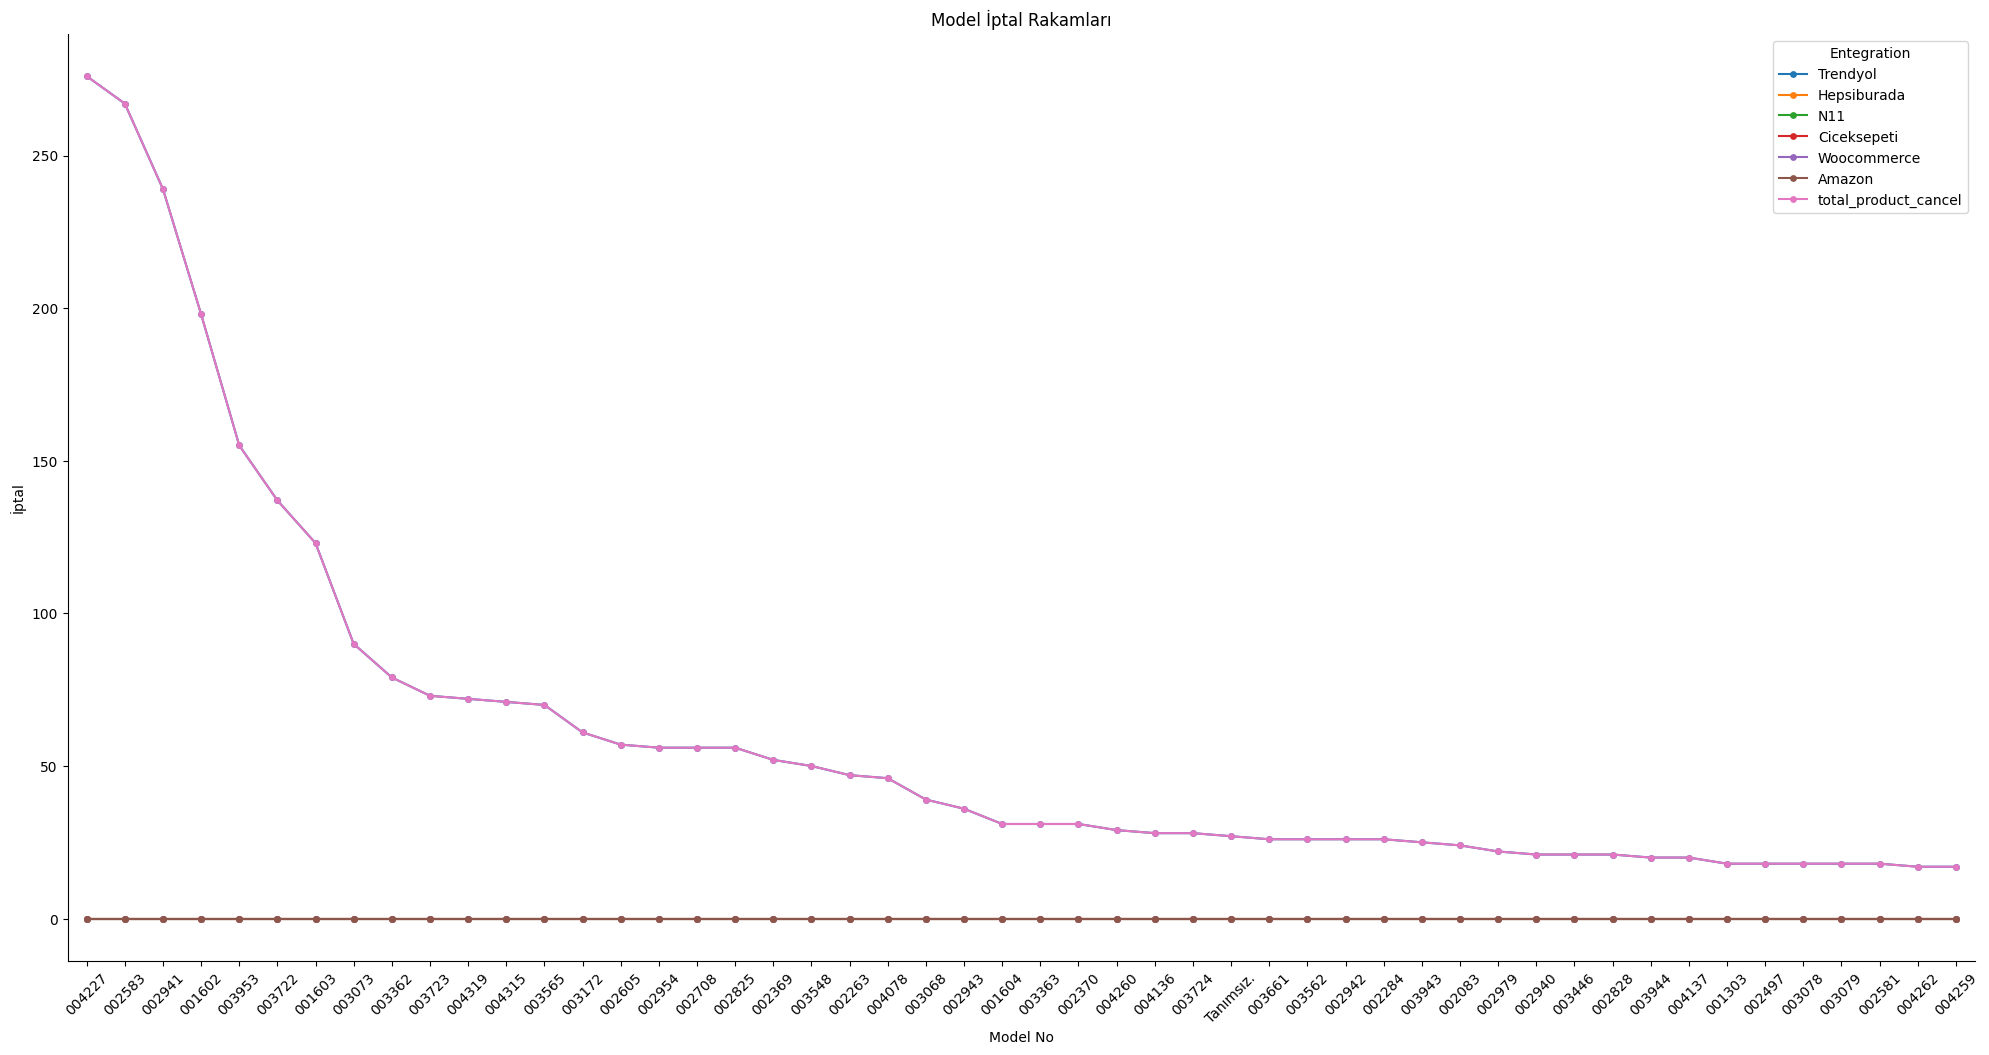

In [130]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.catplot(x="model", y="vals", hue='cols', data=dfm_select2, kind='point', legend_out=False, height=10, aspect=2, linewidth=1.5)
# sns.pointplot(x="model", y="vals", hue='cols', data=dfm_select)
plt.xlabel("Model No")
plt.xticks(rotation=45)
plt.ylabel("İptal")
plt.title("Model İptal Rakamları")
plt.legend(title='Entegration', loc='upper right');

In [131]:
df_cancel_select_top = df_cancel_name_quantity_entegration_drop.head(20)
df_cancel_select_top

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,267,0,0,0,0,0,267
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,239,0,0,0,0,0,239
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,198,0,0,0,0,0,198
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,155,0,0,0,0,0,155
5,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,137,0,0,0,0,0,137
6,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,123,0,0,0,0,0,123
7,Çok Amaçlı Düzenleyici Kutu Mini 40X30X26 Cm Bej,003073,90,0,0,0,0,0,90
8,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,79,0,0,0,0,0,79
9,Awox Sparkling Kahve Makinesi Krom,003723,73,0,0,0,0,0,73


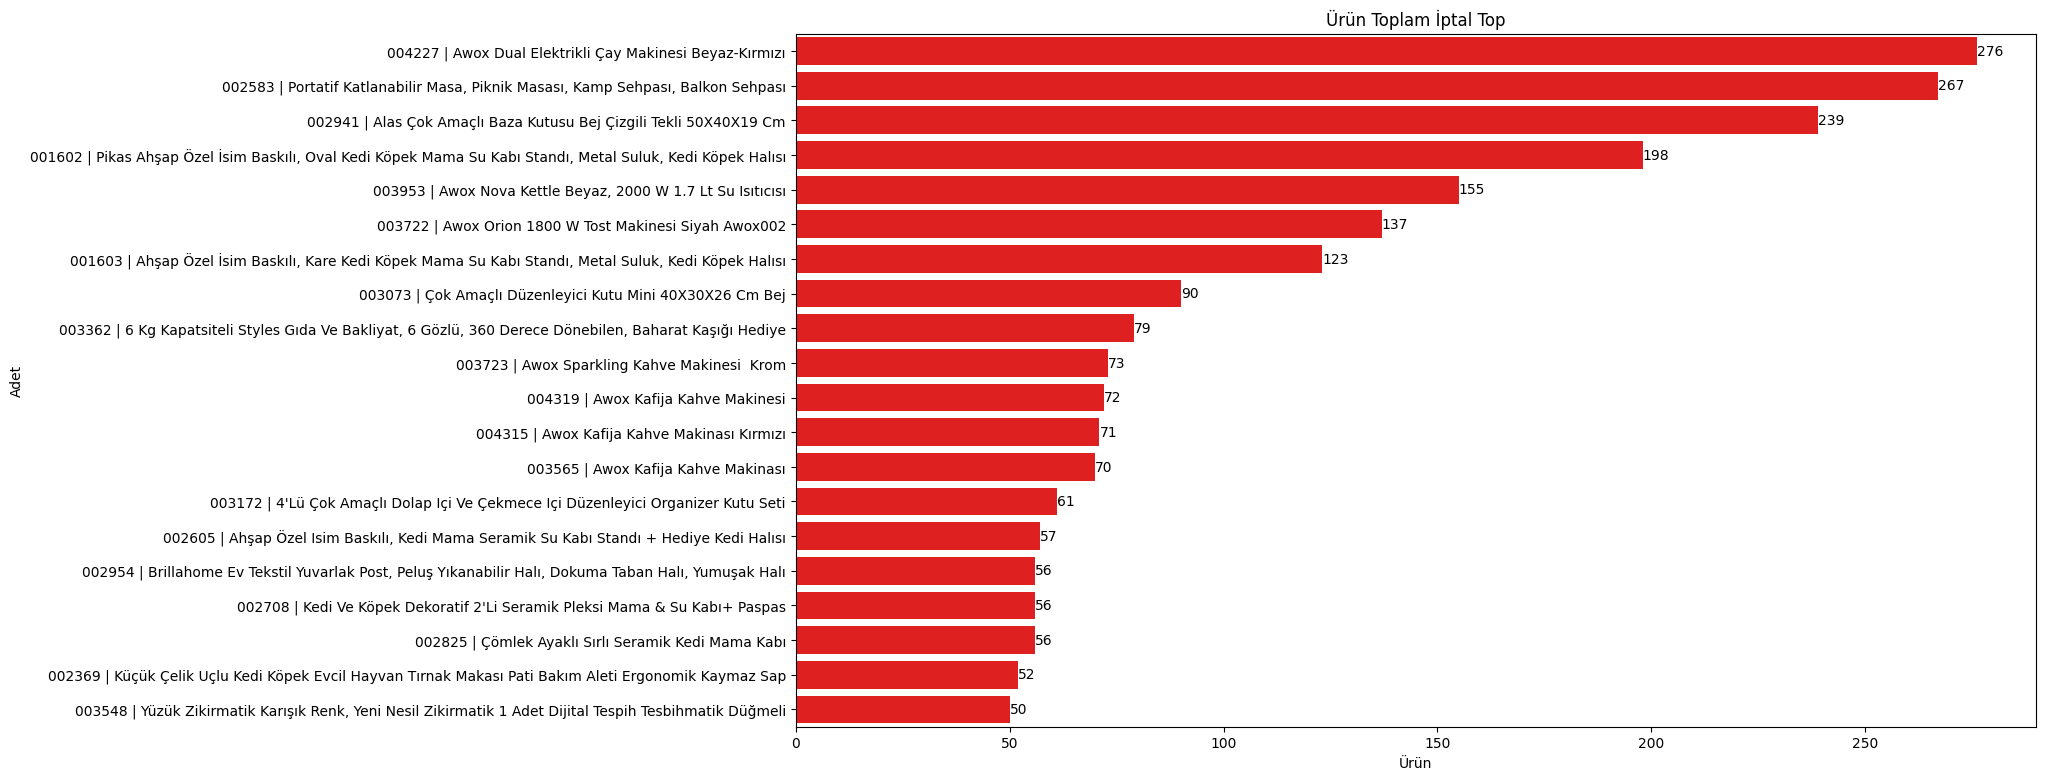

In [132]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_cancel_select_top, x="total_product_cancel", y="product_name", color="red")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Ürün")
# plt.xticks(rotation=45)

# y eksenindeki etiketlere ekleme yapıyoruz. 
ax.set_yticks(range(len(df_cancel_select_top)))  # Etiketlerin konumlarını ayarla
ax.set_yticklabels(list(df_cancel_select_top.loc[:,"model"] + " | " + df_cancel_select_top.loc[:,"product_name"]))

plt.ylabel("Adet")
plt.title("Ürün Toplam İptal Top")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

In [133]:
df_cancel_select_last = df_cancel_name_quantity_entegration_drop.tail(20)
df_cancel_select_last

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
315,"Dekoratif Saçaklı Kablo Kalpli Perde Led, Kalp...",003569,1,0,0,0,0,0,1
316,Anisa Fitted Yastıklı Kumaş Battal Boy Çarşaf,003520,1,0,0,0,0,0,1
317,Vipas Pera Soft Coco Çamaşır Kurutmalığı Lila,003260,1,0,0,0,0,0,1
318,"Amber Cam Şişe, Sprey Başlıklı Şişe 50Ml",003066,1,0,0,0,0,0,1
319,Keçe Kapaklı Kirli Çamaşır Sepeti - Çok Amaçlı...,003104,1,0,0,0,0,0,1
320,Proclis Doğal Kabak Lifli Eşek Sütlü Ballı Doğ...,003152,1,0,0,0,0,0,1
321,"Aksu Cozy Life Pamuklu Diz Battaniyesi, Tv Bat...",003162,1,0,0,0,0,0,1
322,Merinos Micro Çift Kişilik Zikzak Yorgan Şampa...,003175,1,0,0,0,0,0,1
323,Renkli Kedi Köpek Evcil Hayvan Tırnak Makası V...,003220,1,0,0,0,0,0,1
324,Brillahome Mira Kaymaz Taban Şönil Dokuma Hal...,003223,1,0,0,0,0,0,1


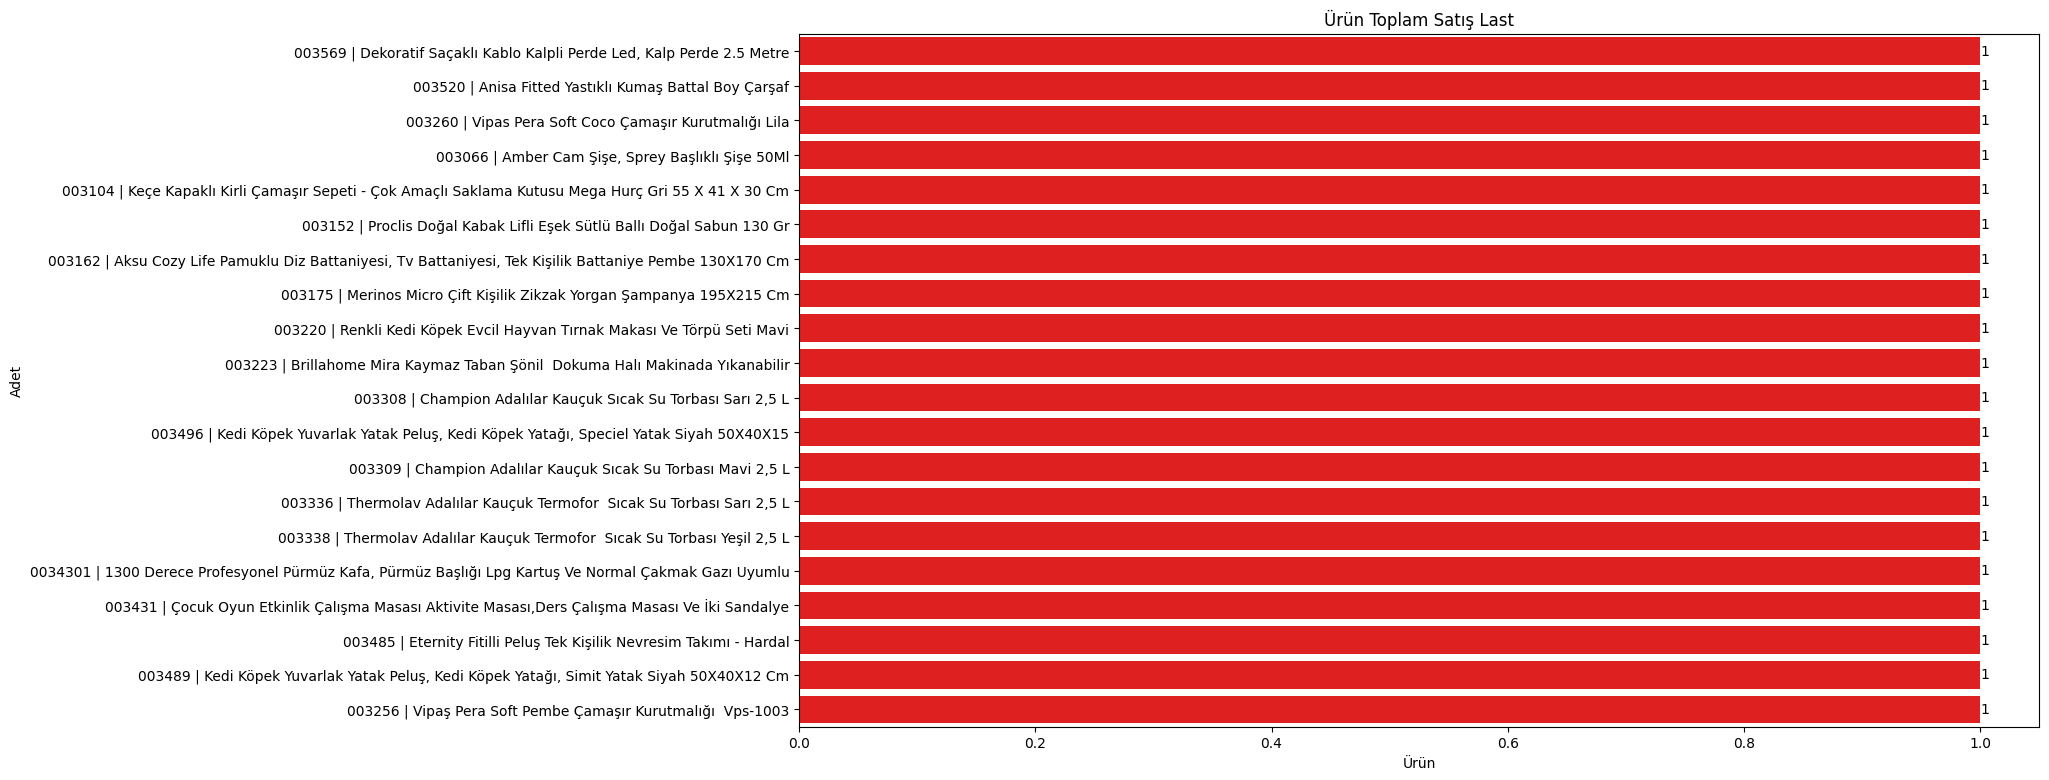

In [134]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_cancel_select_last, x="total_product_cancel", y="product_name", color="red")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Ürün")
# plt.xticks(rotation=45)
# y eksenindeki etiketlere ekleme yapıyoruz. 
ax.set_yticks(range(len(df_cancel_select_last)))  # Etiketlerin konumlarını ayarla
ax.set_yticklabels(list(df_cancel_select_last.loc[:,"model"] + " | " + df_cancel_select_last.loc[:,"product_name"]))

plt.ylabel("Adet")
plt.title("Ürün Toplam Satış Last")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

##### Add Cancel Order To Sales

In [135]:
df_sales_name_quantity_entegration_drop

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,606.0,5.0,4336.0,32.0,5195.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,219.0,0.0,4459.0,0.0,4678.0
...,...,...,...,...,...,...,...,...,...
1031,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1032,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1033,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1034,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [136]:
df_cancel_name_quantity_entegration_drop_var = df_cancel_name_quantity_entegration_drop[["model","total_product_cancel"]]
df_cancel_name_quantity_entegration_drop_var

,model,total_product_cancel
0,004227,276
1,002583,267
2,002941,239
3,001602,198
4,003953,155
...,...,...
330,0034301,1
331,003431,1
332,003485,1
333,003489,1


In [137]:
df_sales_cancel_all = pd.merge(df_sales_name_quantity_entegration_drop, df_cancel_name_quantity_entegration_drop_var, how="left", on="model")
df_sales_cancel_all.fillna(0, inplace=True)
df_sales_cancel_all

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales,total_product_cancel
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0,267.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0,239.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0,198.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,606.0,5.0,4336.0,32.0,5195.0,123.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,219.0,0.0,4459.0,0.0,4678.0,137.0
...,...,...,...,...,...,...,...,...,...,...
1031,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1032,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1033,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1034,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [138]:
# df_sales_cancel_all.to_excel(fr"{output_path}\Entegra_Pazaryeri_Satış_Ve_İptal_Rakamları.xlsx", index=False)

##### Sales Cancel Visualization

In [139]:
df_sales_cancel_all_select = df_sales_cancel_all.head(30)
df_sales_cancel_all_select

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales,total_product_cancel
0,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1514.0,1178.0,5658.0,0.0,8357.0,267.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0,239.0
2,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,219.0,193.0,5693.0,117.0,6456.0,198.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,606.0,5.0,4336.0,32.0,5195.0,123.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,219.0,0.0,4459.0,0.0,4678.0,137.0
5,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,0.0,0.0,327.0,116.0,2715.0,319.0,3477.0,79.0
6,Kedi Ve Köpek Dekoratif 2'Li Seramik Pleksi Ma...,002708,0.0,0.0,38.0,0.0,2889.0,538.0,3465.0,56.0
7,"Yüzük Zikirmatik Karışık Renk, Yeni Nesil Ziki...",003548,0.0,0.0,0.0,65.0,2788.0,333.0,3186.0,50.0
8,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,5.0,1006.0,49.0,1812.0,5.0,2877.0,52.0
9,Tanımsız,Tanımsız.,96.0,3.0,939.0,229.0,907.0,550.0,2724.0,27.0


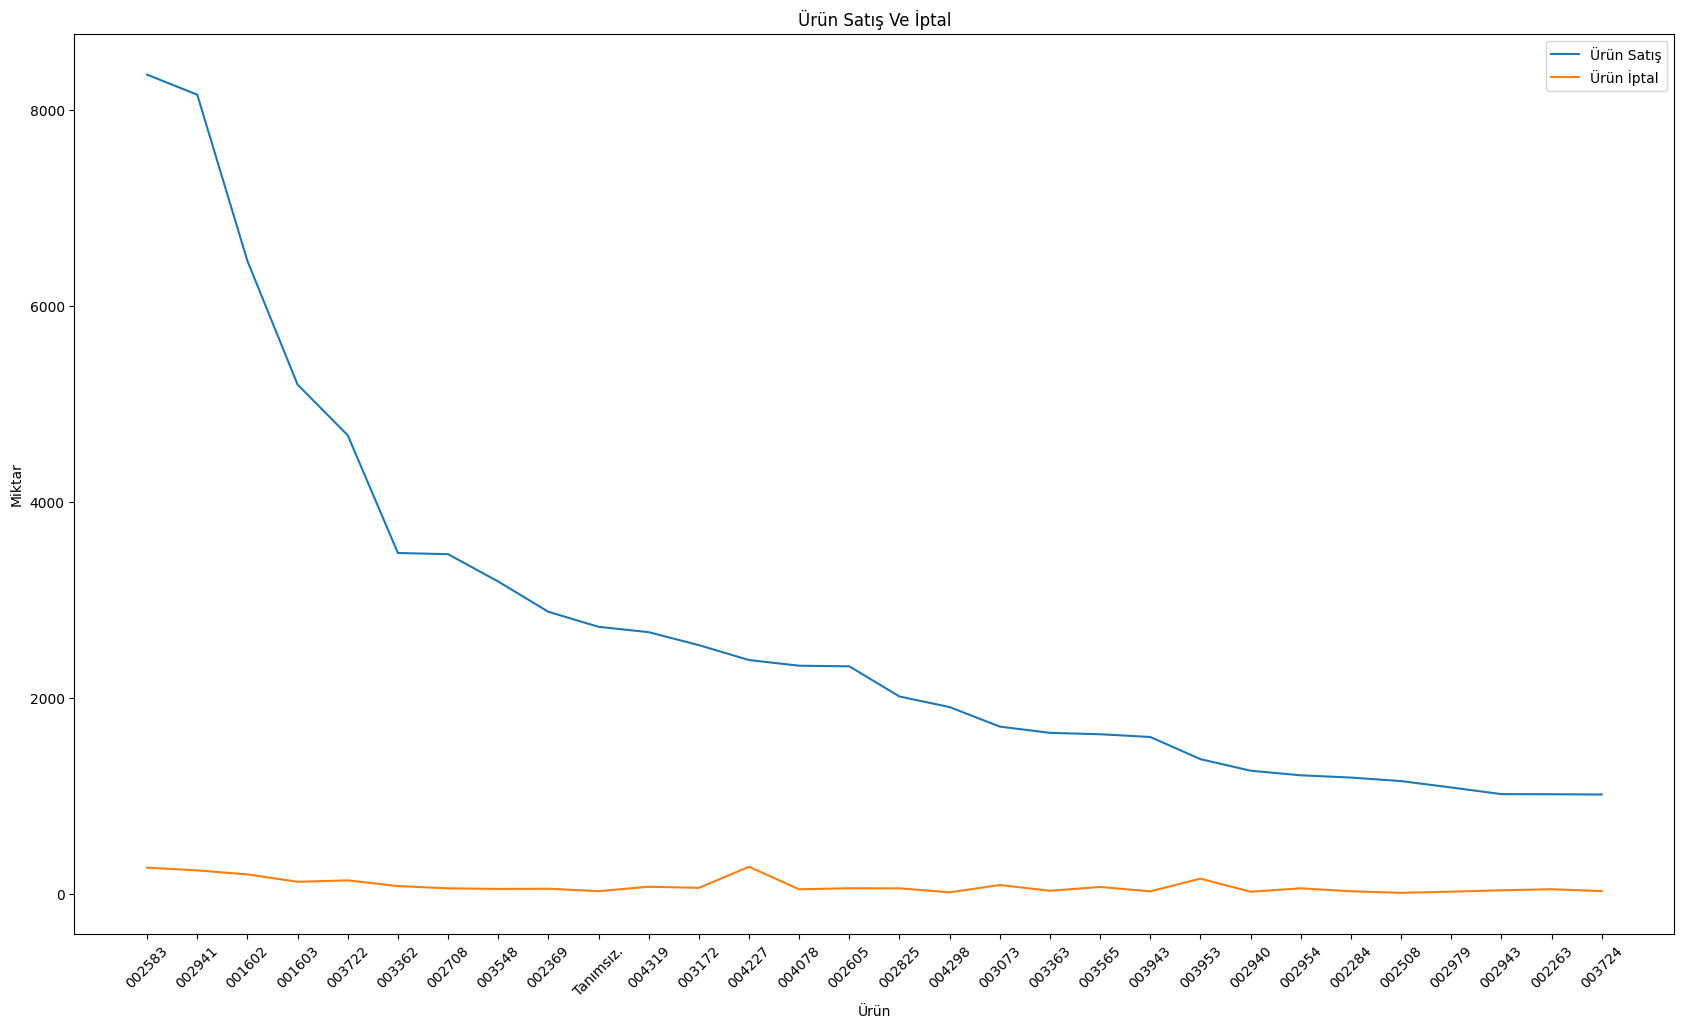

In [140]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(df_sales_cancel_all_select["model"],df_sales_cancel_all_select["total_product_sales"],label='Ürün Satış')
ax.plot(df_sales_cancel_all_select["model"],df_sales_cancel_all_select["total_product_cancel"],label="Ürün İptal")
ax.set_title("Ürün Satış Ve İptal")
ax.set_ylabel("Miktar")
ax.set_xlabel("Ürün")
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticks(), rotation = 40)
ax.legend(loc=0);

In [141]:
df_sales_total_tax = pd.DataFrame(df_entegra_select_sales[["total","tax","grand_total"]].sum()).reset_index()
df_sales_total_tax.rename(columns={"index":"name", 0:"value"}, inplace=True)
df_sales_total_tax

,name,value
0,total,3.288061e+07
1,tax,5.833353e+06
2,grand_total,3.871394e+07


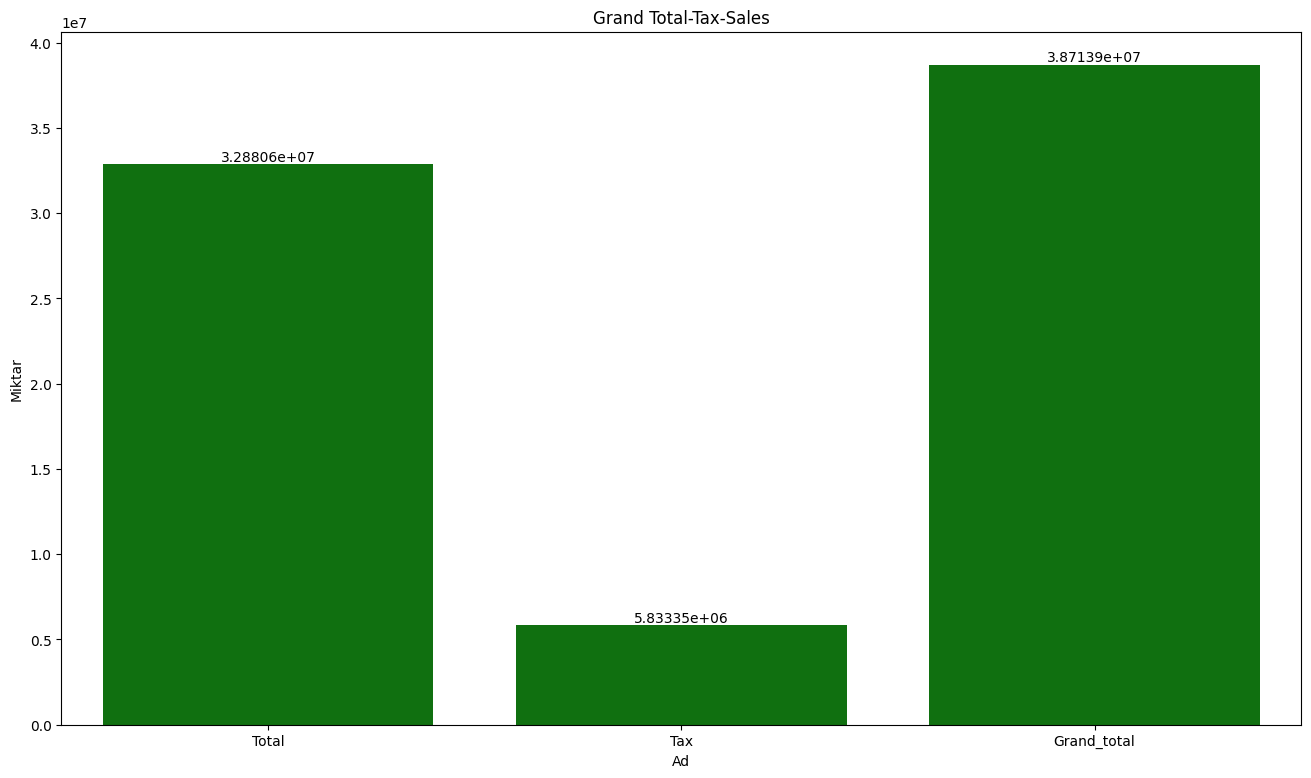

In [142]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_sales_total_tax, x="name", y="value", color="green")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Ad")
# plt.xticks(rotation=45)

# x eksenindeki etiketleri büyük harf yapalım
xticklabel_var = [label.get_text().capitalize() for label in graph.get_xticklabels()]
ax.set_xticks(range(len(xticklabel_var))) # Etiketlerin konumlarını ayarla
ax.set_xticklabels(xticklabel_var)


plt.ylabel("Miktar")
plt.title("Grand Total-Tax-Sales")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

In [143]:
df_cancel_total_tax = pd.DataFrame(df_entegra_select_cancel[["total","tax","grand_total"]].sum()).reset_index()
df_cancel_total_tax.rename(columns={"index":"name", 0:"value"}, inplace=True)
df_cancel_total_tax

,name,value
0,total,1155450.15
1,tax,206657.98
2,grand_total,1362107.42


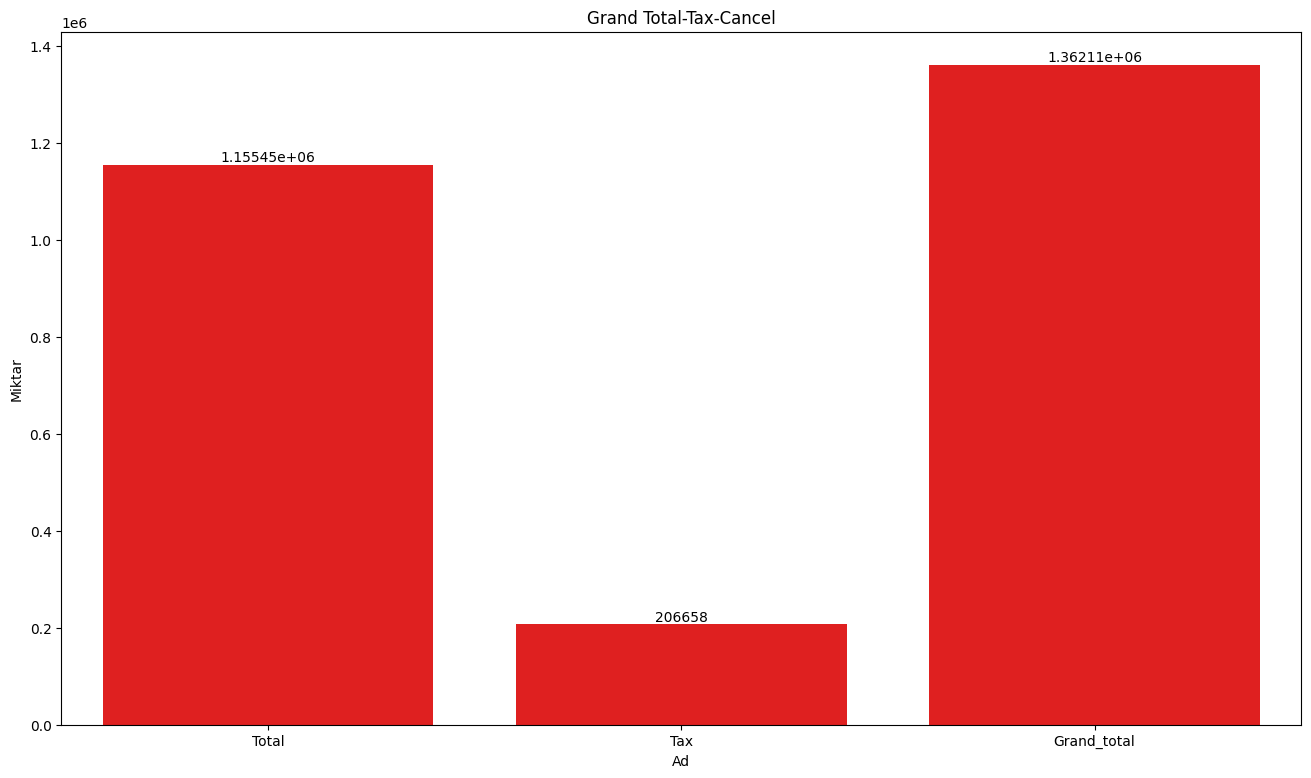

In [144]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(data=df_cancel_total_tax, x="name", y="value", color="red")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Ad")
# plt.xticks(rotation=45)

# x eksenindeki etiketleri büyük harf yapalım
xticklabel_var = [label.get_text().capitalize() for label in graph.get_xticklabels()]
ax.set_xticks(range(len(xticklabel_var))) # Etiketlerin konumlarını ayarla
ax.set_xticklabels(xticklabel_var)


plt.ylabel("Miktar")
plt.title("Grand Total-Tax-Cancel")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

In [145]:
# for i in graph.get_xticklabels():
#     print(i.get_text())

In [146]:
# for i in [label.get_text() for label in graph.get_xticklabels()]:
#     print(str.capitalize(i))

In [147]:
df_entegra_total_tax = df_entegra_select[["entegration","total","tax","grand_total"]]
df_entegra_total_tax

,entegration,total,tax,grand_total
0,Trendyol,383.33,76.67,460.0
1,Trendyol,154.17,30.83,185.0
2,Trendyol,298.33,59.67,358.0
3,Trendyol,300.00,60.00,360.0
4,Trendyol,383.33,76.67,460.0
...,...,...,...,...
94829,N11,153.64,15.36,169.0
94830,Trendyol,318.18,31.82,350.0
94831,Trendyol,312.50,62.50,375.0
94832,N11,153.64,15.36,169.0


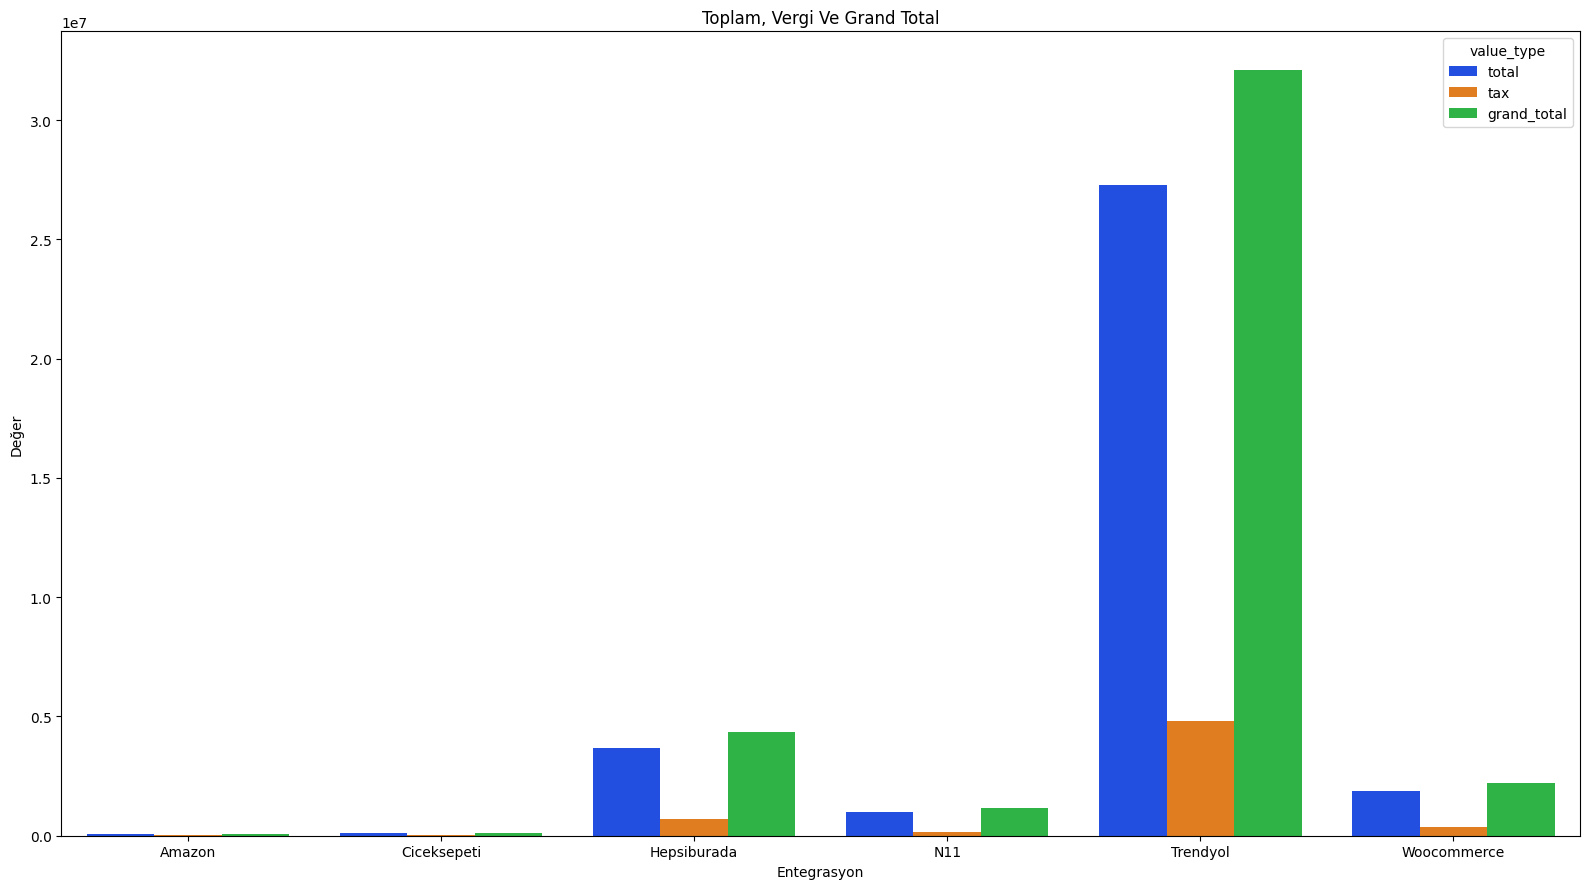

In [148]:
df_grouped = df_entegra_total_tax.groupby('entegration').sum().reset_index()

# Melt işlemi ile total, tax, grand_total sütunlarını birleştirelim
df_melted = pd.melt(df_grouped, id_vars=['entegration'], value_vars=['total', 'tax', 'grand_total'], var_name='value_type', value_name='value')

# Grafik çizimi için seaborn barplot kullanalım
plt.figure(figsize=(16, 9))
graph = sns.barplot(data=df_melted, x='entegration', y='value', hue='value_type', palette='bright')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Toplam, Vergi Ve Grand Total')
plt.xlabel('Entegrasyon')
plt.ylabel('Değer')

# Görseli gösterelim
plt.tight_layout()
plt.show()

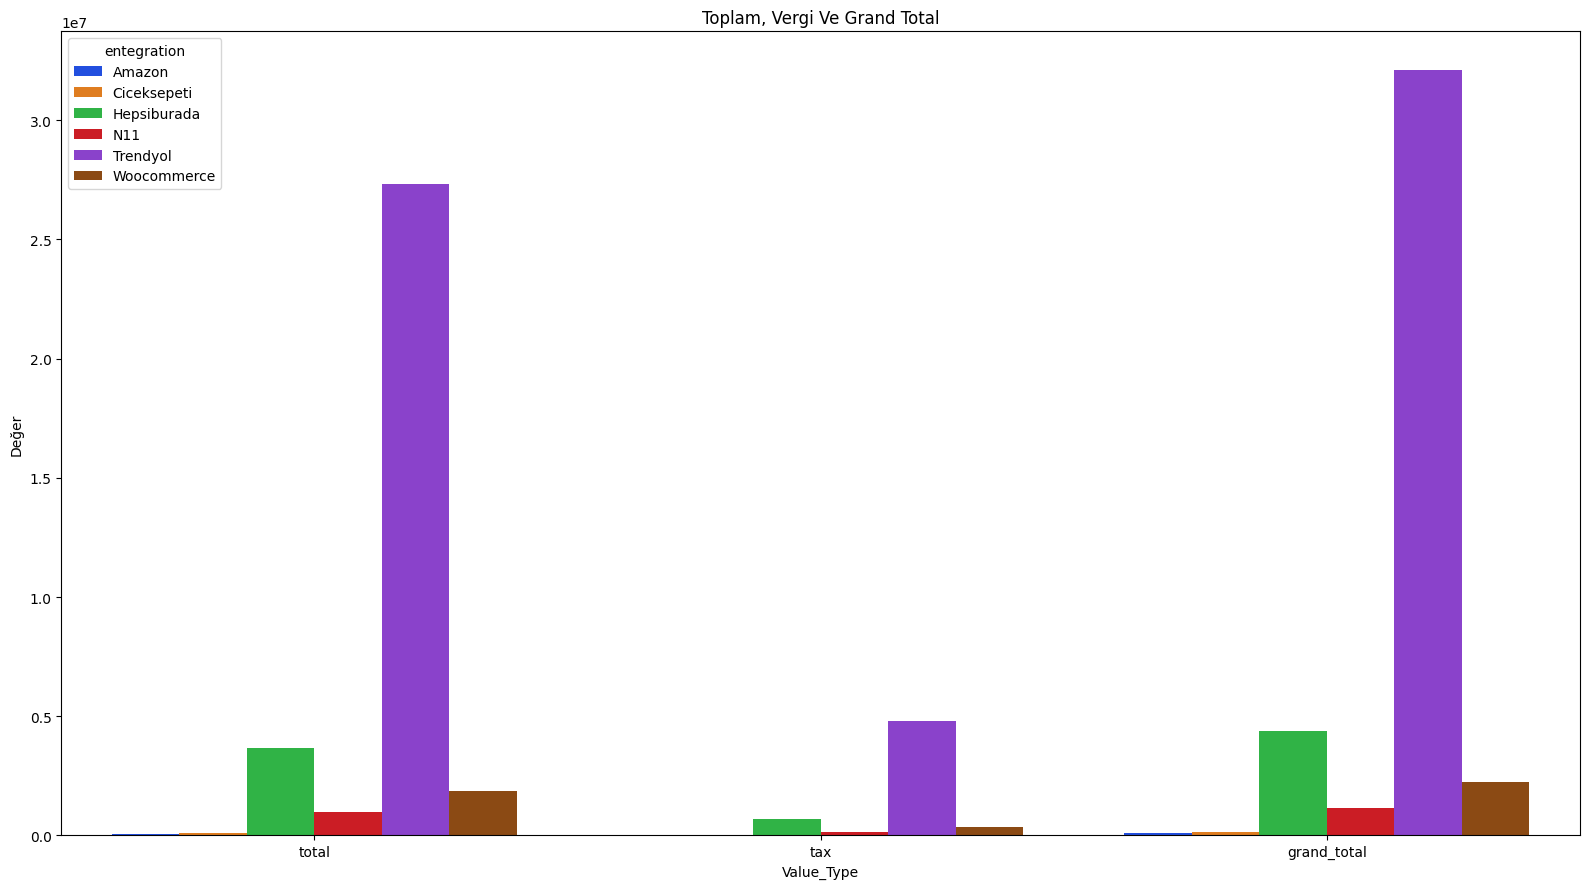

In [149]:
df_grouped = df_entegra_total_tax.groupby('entegration').sum().reset_index()

# Melt işlemi ile total, tax, grand_total sütunlarını birleştirelim
df_melted = pd.melt(df_grouped, id_vars=['entegration'], value_vars=['total', 'tax', 'grand_total'], var_name='value_type', value_name='value')

# Grafik çizimi için seaborn barplot kullanalım
plt.figure(figsize=(16, 9))
graph = sns.barplot(data=df_melted, x='value_type', y='value', hue='entegration', palette='bright')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Toplam, Vergi Ve Grand Total')
plt.xlabel('Value_Type')
plt.ylabel('Değer')

# Görseli gösterelim
plt.tight_layout()
plt.show()

##### Sales Time Analysis

In [150]:
df_entegra_select_sales

,model,product_name,datetime,date,time,total_product_quantity,entegration,total,tax,grand_total,cargo_company,status_name,city,country,latitude,longitude
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,2024-07-11,16:21:44,1,Trendyol,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Yalova,Türkiye,40.592898,29.077612
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,2024-07-11,16:20:54,1,Trendyol,154.17,30.83,185.0,Trendyolekspress,Onaylandı,Bolu,Türkiye,40.621210,31.646026
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,2024-07-11,16:20:05,1,Trendyol,298.33,59.67,358.0,Trendyolekspress,Onaylandı,Ağrı,Türkiye,39.777918,43.168437
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2024-07-11,16:19:57,2,Trendyol,300.00,60.00,360.0,Trendyolekspress,Onaylandı,İstanbul,Türkiye,41.006381,28.975872
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,2024-07-11,16:19:42,1,Trendyol,383.33,76.67,460.0,Trendyolekspress,Onaylandı,Samsun,Türkiye,41.294615,36.332060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92429,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,2024-01-01,00:18:00,1,N11,153.64,15.36,169.0,Mng,Yeni Siparis,Kütahya,Türkiye,39.252251,29.493773
92430,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,2024-01-01,00:14:43,3,Trendyol,318.18,31.82,350.0,Trendyolekspress,Onaylandı,Adıyaman,Türkiye,37.763750,38.276348
92431,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,2024-01-01,00:02:03,1,Trendyol,312.50,62.50,375.0,Trendyolekspress,Onaylandı,Aydın,Türkiye,37.837948,27.845691
92432,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,2024-01-01,00:02:00,1,N11,153.64,15.36,169.0,Mng,Yeni Siparis,Kocaeli,Türkiye,40.821654,29.950718


In [166]:
df_sales_time_select = df_entegra_select_sales[["date","time","total","tax","grand_total"]]
df_sales_time_select.head(5)

,date,time,total,tax,grand_total
0,2024-07-11,16:21:44,383.33,76.67,460.0
1,2024-07-11,16:20:54,154.17,30.83,185.0
2,2024-07-11,16:20:05,298.33,59.67,358.0
3,2024-07-11,16:19:57,300.00,60.00,360.0
4,2024-07-11,16:19:42,383.33,76.67,460.0


In [181]:
df_sales_time_select.loc[:,"month"] = pd.to_datetime(df_sales_time_select.loc[:,"date"], format='%Y-%m-%d').dt.month
df_sales_time_select.loc[:,"hour"] = pd.to_datetime(df_sales_time_select.loc[:,"time"], format='%H:%M:%S').dt.hour
df_sales_time_select.head(5)

,date,time,total,tax,grand_total,month,hour
0,2024-07-11,16:21:44,383.33,76.67,460.0,7,16
1,2024-07-11,16:20:54,154.17,30.83,185.0,7,16
2,2024-07-11,16:20:05,298.33,59.67,358.0,7,16
3,2024-07-11,16:19:57,300.00,60.00,360.0,7,16
4,2024-07-11,16:19:42,383.33,76.67,460.0,7,16


In [185]:
df_sales_time_month = df_sales_time_select.groupby("month")[["total","tax","grand_total"]].sum().reset_index()
df_sales_time_month

,month,total,tax,grand_total
0,1,4.085632e+06,6.961566e+05,4.781784e+06
1,2,3.769416e+06,6.787498e+05,4.448163e+06
2,3,4.205360e+06,7.650283e+05,4.970385e+06
3,4,5.104511e+06,8.856791e+05,5.990187e+06
4,5,7.879479e+06,1.418062e+06,9.297537e+06
5,6,5.959938e+06,1.054920e+06,7.014850e+06
6,7,1.876276e+06,3.347575e+05,2.211032e+06


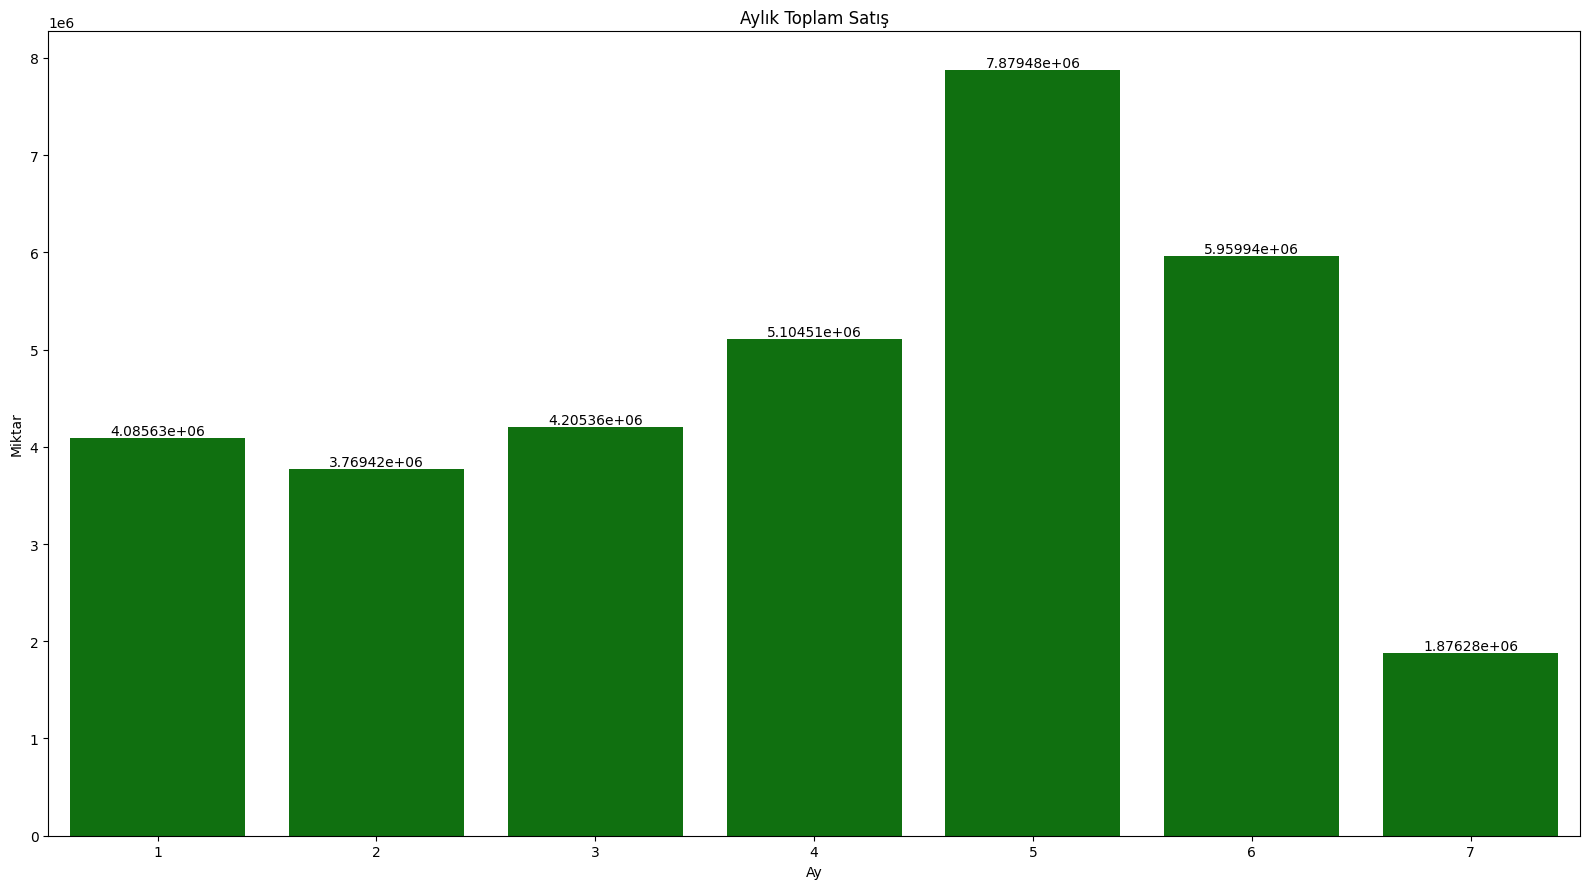

In [190]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)

# graph = sns.barplot(data=df_entegra_select_sales, x=pd.to_datetime(df_entegra_select_sales["date"]).dt.month, y='total', estimator="sum")
graph = sns.barplot(data=df_sales_time_month, x='month', y='total', color='green')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Aylık Toplam Satış')
plt.xlabel('Ay')
plt.ylabel('Miktar')
graph.bar_label(ax.containers[0])

# Görseli gösterelim
plt.tight_layout()
plt.show()

In [191]:
df_sales_time_hour = df_sales_time_select.groupby("hour")[["total","tax","grand_total"]].sum().reset_index()
df_sales_time_hour

,hour,total,tax,grand_total
0,0,1.398974e+06,243771.1689,1.642743e+06
1,1,7.899268e+05,136454.0618,9.263803e+05
2,2,3.768092e+05,64494.8345,4.413036e+05
3,3,1.975475e+05,32664.1577,2.302114e+05
4,4,1.455611e+05,25850.8459,1.714118e+05
5,5,1.638063e+05,29356.9582,1.931631e+05
6,6,2.055583e+05,36802.6601,2.423609e+05
7,7,4.013082e+05,73500.7132,4.748086e+05
8,8,7.330217e+05,131021.7634,8.640430e+05
9,9,1.187563e+06,213509.7806,1.401072e+06


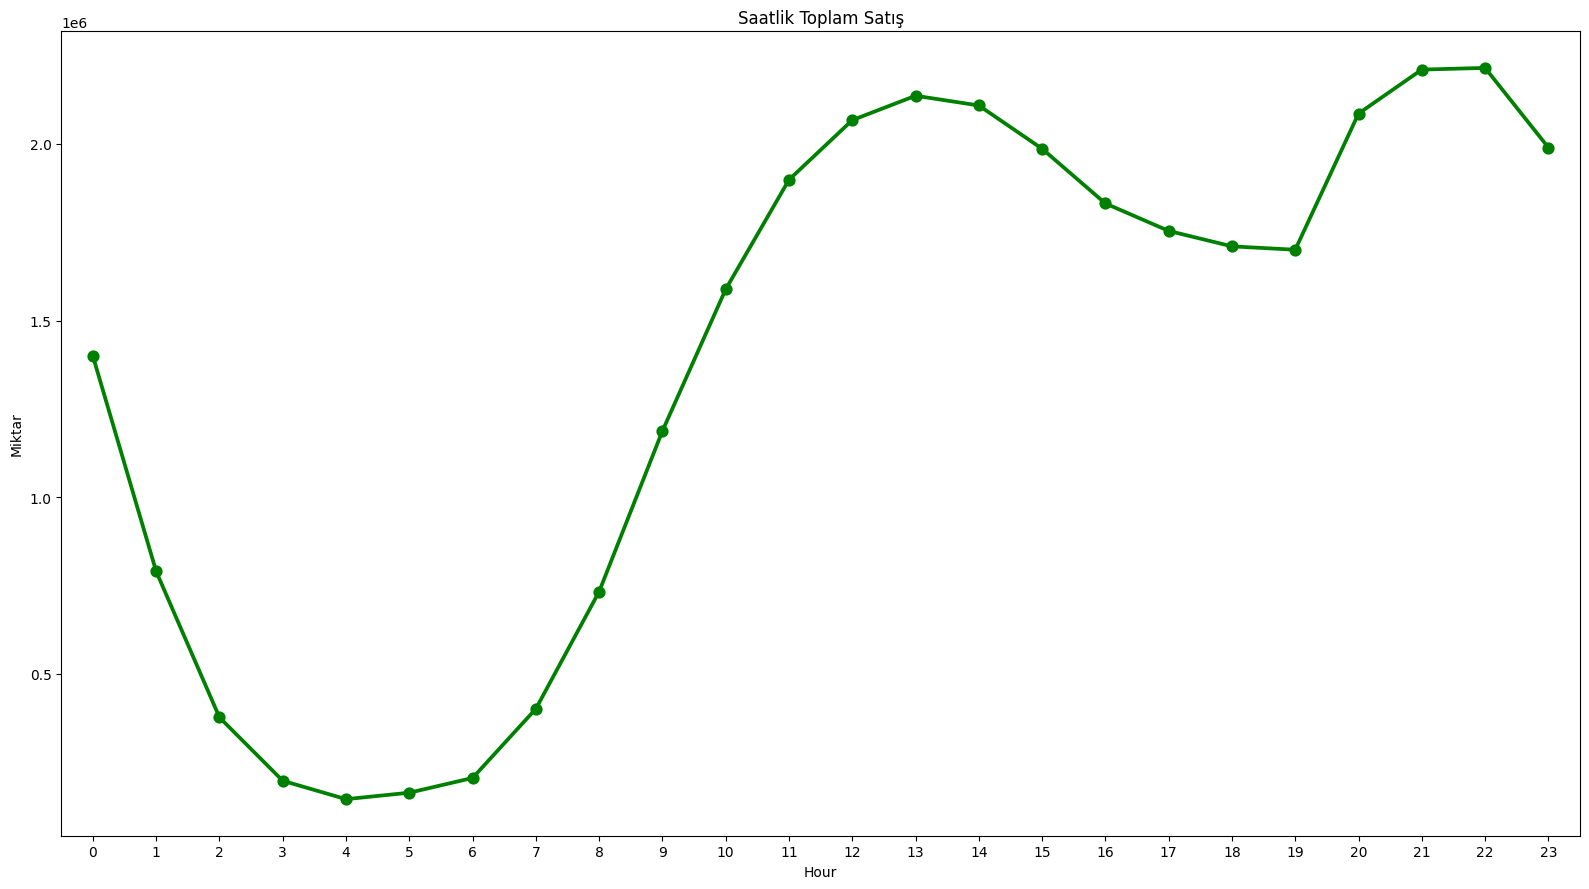

In [196]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)

# graph = sns.barplot(data=df_entegra_select_sales, x=pd.to_datetime(df_entegra_select_sales["date"]).dt.month, y='total', estimator="sum")
graph = sns.pointplot(data=df_sales_time_hour, x='hour', y='total', color='green')

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Saatlik Toplam Satış')
plt.xlabel('Hour')
plt.ylabel('Miktar')

# Görseli gösterelim
plt.tight_layout()
plt.show()